# **Marketing Campaign Analysis**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
 There is a large scale of customers with many features. If we don't divide them into cluster depending on the similar 
characteristics. We cannot design appropriate strategy targeting at different customers. 

### **The objective:**

 - What is the intended goal?
 Divide the customer groups into several clustering with close or similar features and estimate the core features of every clusters. 

### **The key questions:**

- What are the key questions that need to be answered?
The key question is how to divide the customer group and obtain each of them's features. 

### **The problem formulation**:

- What is it that we are trying to solve using data science?
Unsupervised maching learning algorithm that can automatrically conduct clustering of data. 


------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Import the necessary libraries and load the data**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values
- Drop the column which has no null values

In [118]:
# loading the dataset
df = pd.read_csv("marketing_campaign.csv")

In [119]:
print(df.shape)

(2240, 27)


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [121]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [122]:
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
2235         1  13-06-2013       46       709  ...                    3   
2236         1  10-06-2014       56       406  ...                    2   
2237         0  25-01-2014       91       908  ...                    3   
2238         1  24-01-2014        8       428  ...                    5   
2239         1  15-10-2012       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[5 rows x 27 columns]

In [123]:
df = df.drop(['ID'], axis=1)

In [124]:
df=df.dropna()

In [125]:
print(df.shape)

(2216, 26)


#### **Observations and Insights from the Data overview: there existing some null values in the dataset and I have drop them. 

## **Exploratory Data Analysis (EDA)**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master?
4. There are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories?

In [126]:
#summary statistics
df.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2216.000000    2216.000000  2216.000000  2216.000000  2216.000000   
mean   1968.820397   52247.251354     0.441787     0.505415    49.012635   
std      11.985554   25173.076661     0.536896     0.544181    28.948352   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2216.000000  2216.000000      2216.000000      2216.000000   
mean    305.091606    26.356047       166.995939        37.637635   
std     337.327920    39.793917       224.283273        54.752082   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     174.500000     8.000000        68.000000        12.000000   
75%     505.000000    33.000000       232.250000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2216.000000  ...          2216.000000        2216.000000   
mean          27.028881  ...             2.671029           5.800993   
std           41.072046  ...             2.926734           3.250785   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          262.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.319043      0.073556      0.074007      0.073105   
std             2.425359      0.261106      0.261842      0.260367   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  
count   2216.000000   2216.000000  2216.000000  2216.000000  
mean       0.064079      0.013087     0.009477     0.150271  
std        0.244950      0.113672     0.096907     0.357417  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

In [127]:
#unique values 
categorical_columns = df.select_dtypes(include=["object"])
category_counts = pd.DataFrame(columns=["Column", "Unique Observations"])

# Iterating over each categorical column
for column in categorical_columns:
    unique_values = df[column].nunique()
    category_counts = category_counts.append({"Column": column, "Unique Observations": unique_values}, ignore_index=True)

# Printing the dataframe
print(category_counts)


           Column Unique Observations
0       Education                   5
1  Marital_Status                   8
2     Dt_Customer                 662


the beyond method selecting by the data type of object but according to the data itmes' meaning. The category columns also include "Kidhome", "Teenhome", "Complain" but exclude Dt_Customer. 

In [128]:
categorical_columns = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]
category_counts = pd.DataFrame(columns=["Column", "Unique Observations"])

# Iterating over each categorical column
for column in categorical_columns:
    unique_values = df[column].nunique()
    category_counts = category_counts.append({"Column": column, "Unique Observations": unique_values}, ignore_index=True)

# Printing the dataframe
print(category_counts)

           Column Unique Observations
0       Education                   5
1  Marital_Status                   8
2         Kidhome                   3
3        Teenhome                   3
4        Complain                   2


In [129]:
category_counts = df['Marital_Status'].value_counts()

In [130]:
category_counts

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

observation: the marital status has 8 categories and some of them have similar meanings so we combine them together. I  combine Alone and Absurd and YOLO into single. 

In [131]:
replace_dict = {"Alone": "Single", "Absurd": "Single", "YOLO": "Single"}

# Replace the values in the specified column
df['Marital_Status'] = df['Marital_Status'].replace(replace_dict)

In [132]:
# Replace the category "2n Cycle" with the category "Master"
replace_dict = {"2n Cycle": "Master"}
df["Education"]= df['Education'].replace(replace_dict)  

### **Univariate Analysis on Numerical and Categorical data**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables. 

- Plot histogram and box plot for different numerical features and understand how the data looks like.
- Explore the categorical variables like Education, Kidhome, Teenhome, Complain.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. How does the distribution of Income variable vary across the dataset?
2. The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?
3. There are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? At what percentile the upper whisker lies?


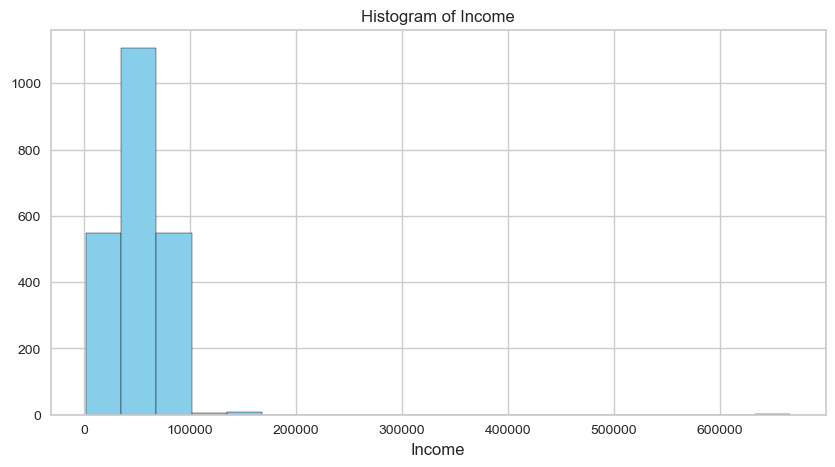

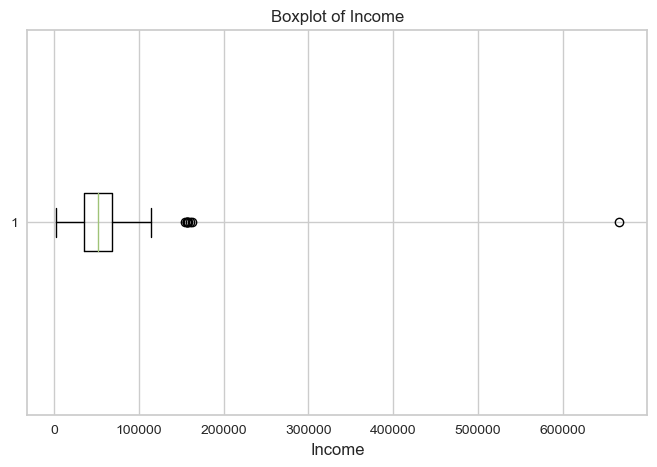

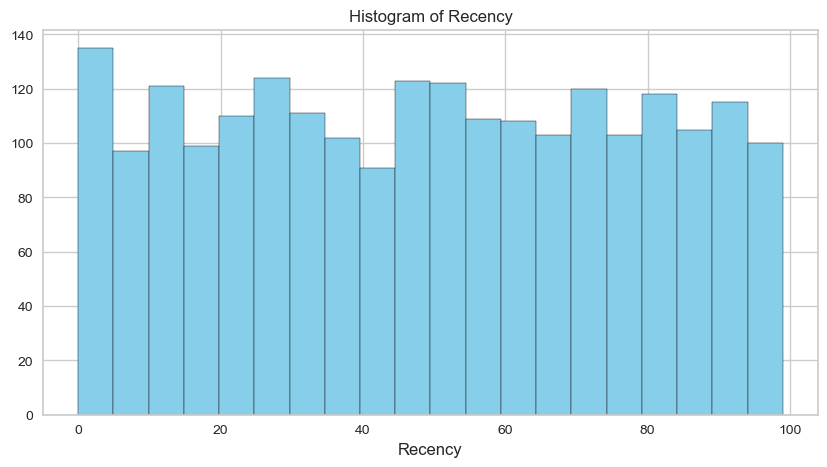

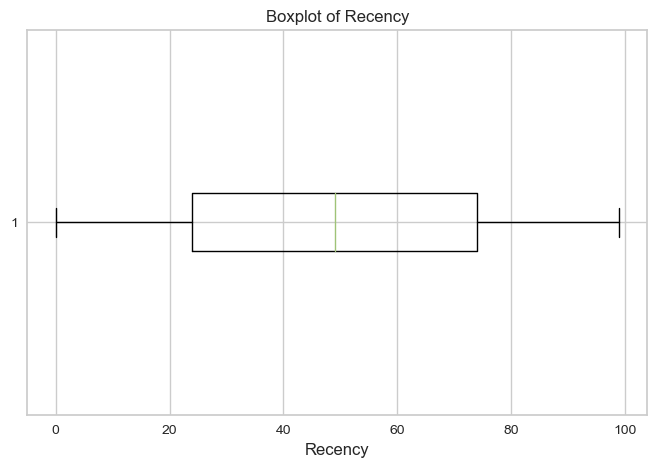

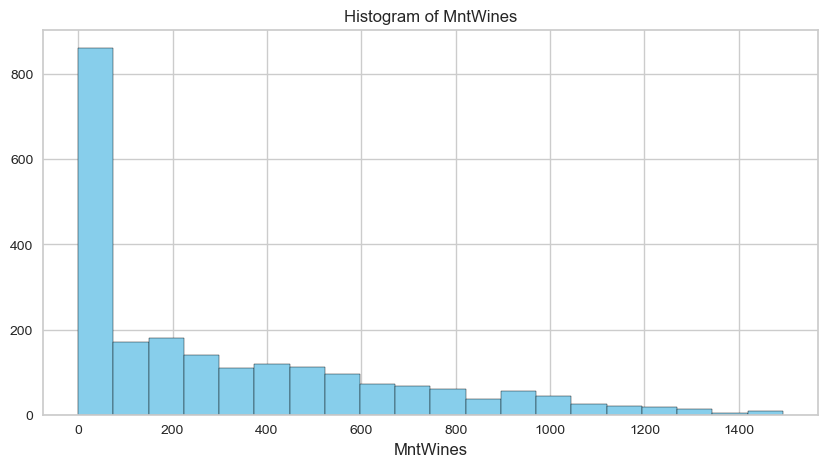

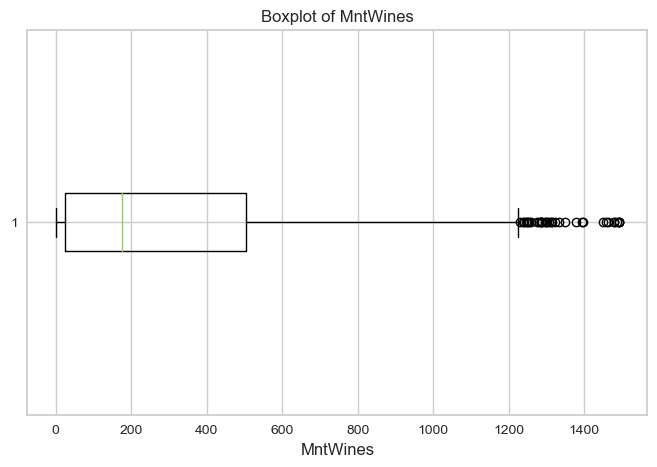

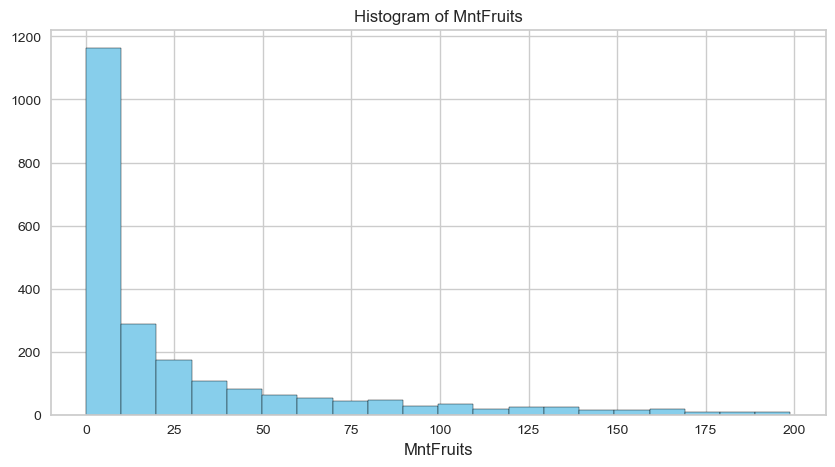

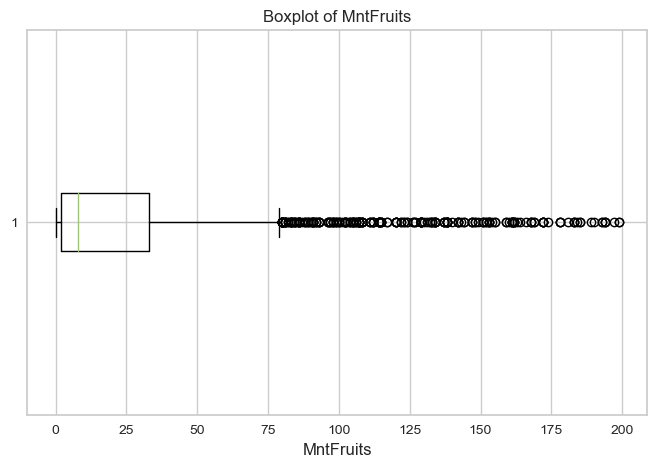

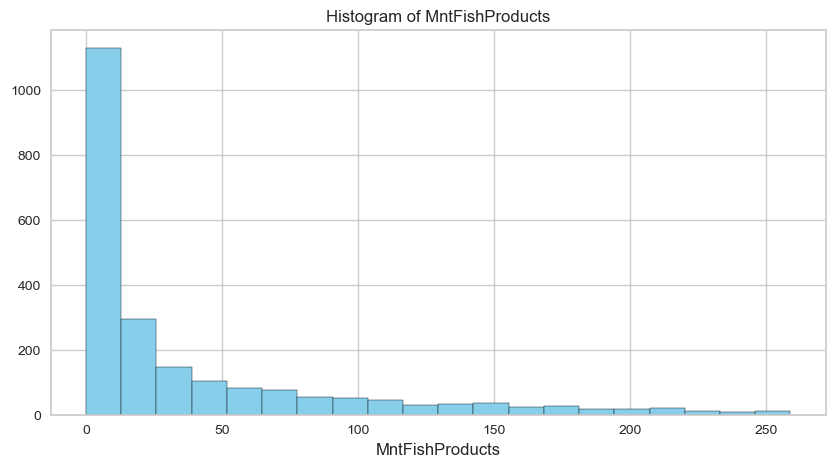

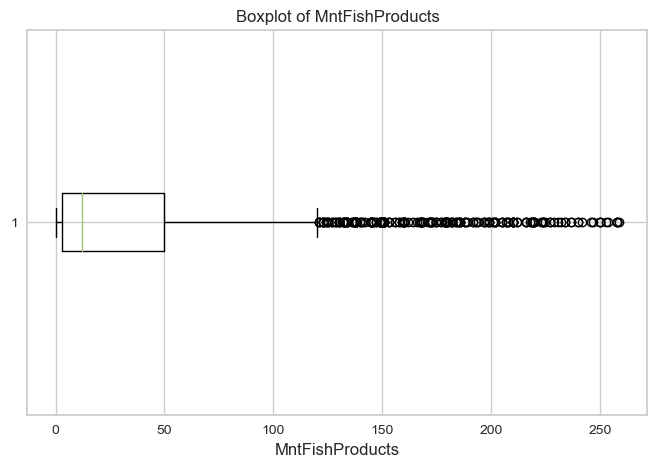

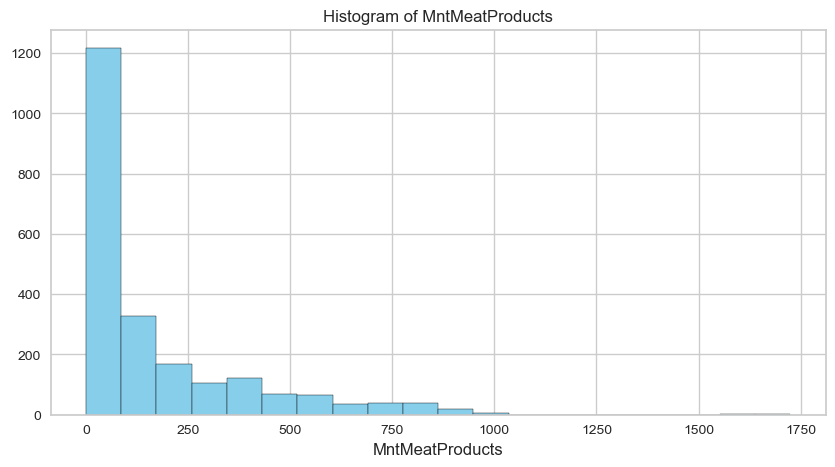

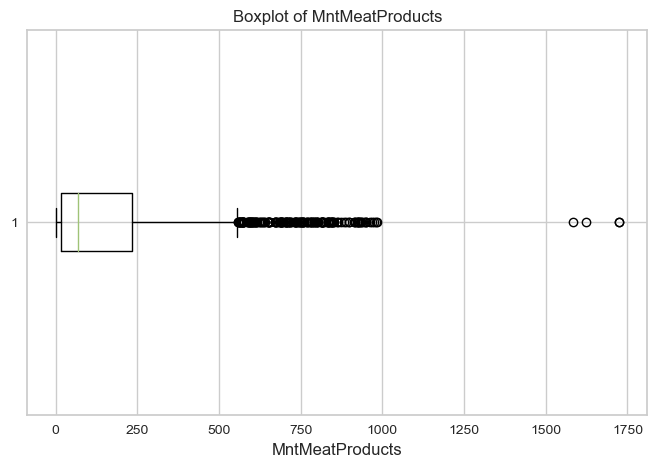

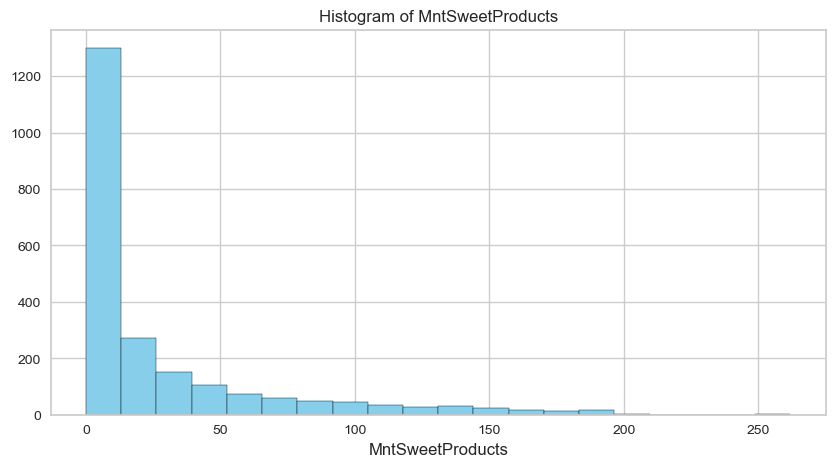

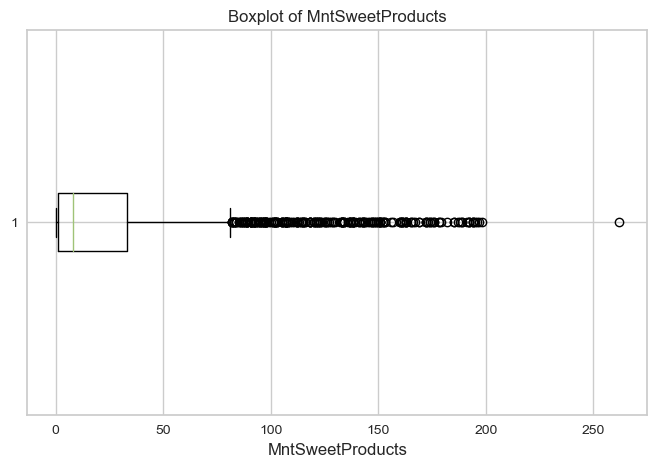

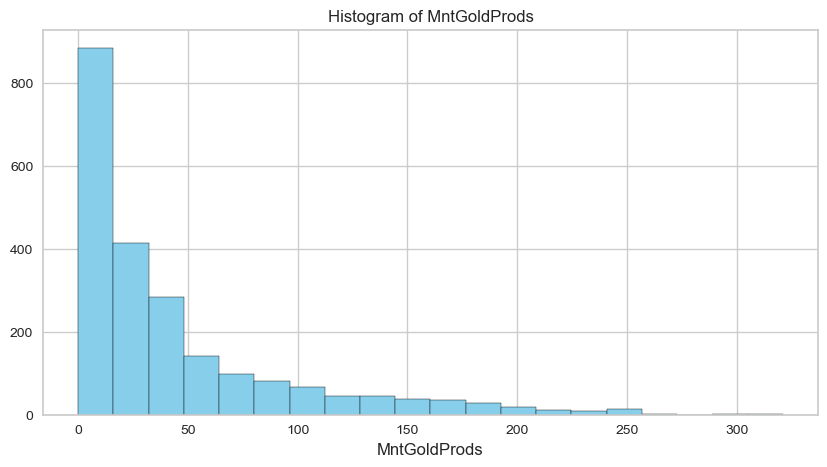

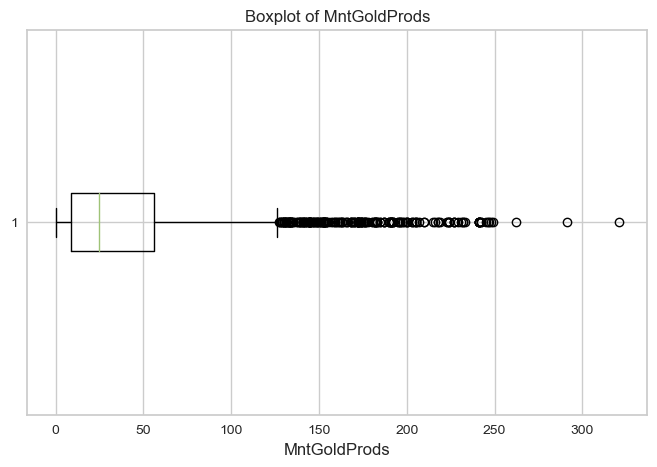

In [133]:
column_name = ["Income", "Recency", "MntWines", "MntFruits", "MntFishProducts", "MntMeatProducts", "MntSweetProducts", "MntGoldProds"]

# Create a histogram
for column_name in column_name:
    plt.figure(figsize=(10, 5))
    plt.hist(df[column_name], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column_name)
    plt.title("Histogram of {}".format(column_name))
    plt.grid(True)
    plt.show()

# Create a boxplot
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[column_name], vert=False)
    plt.xlabel(column_name)
    plt.title("Boxplot of {}".format(column_name))
    plt.grid(True)
    plt.show()



According to the income distribution graphics, we can see the income is prone to normal distribution but still with some outliers. 

In [134]:
#check the position of outliers 
Q1 = df.quantile(q=0.25)                          # Finding the first quartile
Q3 = df.quantile(q=0.75)                          # Finding the third quartile
IQR = Q3 - Q1                                       # Finding the Inter Quartile Range
upper_whisker = (Q3 + 1.5 * IQR)                    # Calculating the Upper Whisker for the Income variable
print(upper_whisker)                                # Printing Upper Whisker

Year_Birth               2004.000
Income                 118350.500
Kidhome                     2.500
Teenhome                    2.500
Recency                   149.000
MntWines                 1226.500
MntFruits                  79.500
MntMeatProducts           556.625
MntFishProducts           120.500
MntSweetProducts           81.000
MntGoldProds              126.500
NumDealsPurchases           6.000
NumWebPurchases            12.000
NumCatalogPurchases        10.000
NumStorePurchases          15.500
NumWebVisitsMonth          13.000
AcceptedCmp3                0.000
AcceptedCmp4                0.000
AcceptedCmp5                0.000
AcceptedCmp1                0.000
AcceptedCmp2                0.000
Complain                    0.000
Response                    0.000
dtype: float64


In [135]:
#extreme income values 
df[df.Income > 118350.500]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
164         1973         PhD        Married  157243.0        0         1   
617         1976         PhD       Together  162397.0        1         1   
655         1975  Graduation       Divorced  153924.0        0         0   
687         1982         PhD        Married  160803.0        0         0   
1300        1971      Master       Together  157733.0        1         0   
1653        1977  Graduation       Together  157146.0        0         0   
2132        1949         PhD        Married  156924.0        0         0   
2233        1977  Graduation       Together  666666.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
164   01-03-2014       98        20          2  ...                   22   
617   03-06-2013       31        85          1  ...                    0   
655   07-02-2014       81         1          1  ...                    0   
687   04-08-2012       21        55         16  ...                   28   
1300  04-06-2013       37        39          1  ...                    0   
1653  29-04-2013       13         1          0  ...                   28   
2132  29-08-2013       85         2          1  ...                    0   
2233  02-06-2013       23         9         14  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
164                   0                  0             0             0   
617                   1                  1             0             0   
655                   0                  0             0             0   
687                   1                  0             0             0   
1300                  1                  1             0             0   
1653                  0                  1             0             0   
2132                  0                  0             0             0   
2233                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
164              0             0             0         0         0  
617              0             0             0         0         0  
655              0             0             0         0         0  
687              0             0             0         0         0  
1300             0             0             0         0         0  
1653             0             0             0         0         0  
2132             0             0             0         0         0  
2233             0             0             0         0         0  

[8 rows x 26 columns]

In [136]:
#99.5% percentile value 
percentile_99_5 = df.quantile(q=0.995)["Income"]
print(percentile_99_5)

102145.75000000003


Frome the 99.5% percentile value and upper whisker, we can see teh extreme value are less than 0.5% in the whole data so we can drop them. 

In [137]:
df.drop(index=[164, 617, 655,687,1300,1653,2132,2233], inplace=True)


For the other several variables, the distrubition are all left skewed with many outliers. 

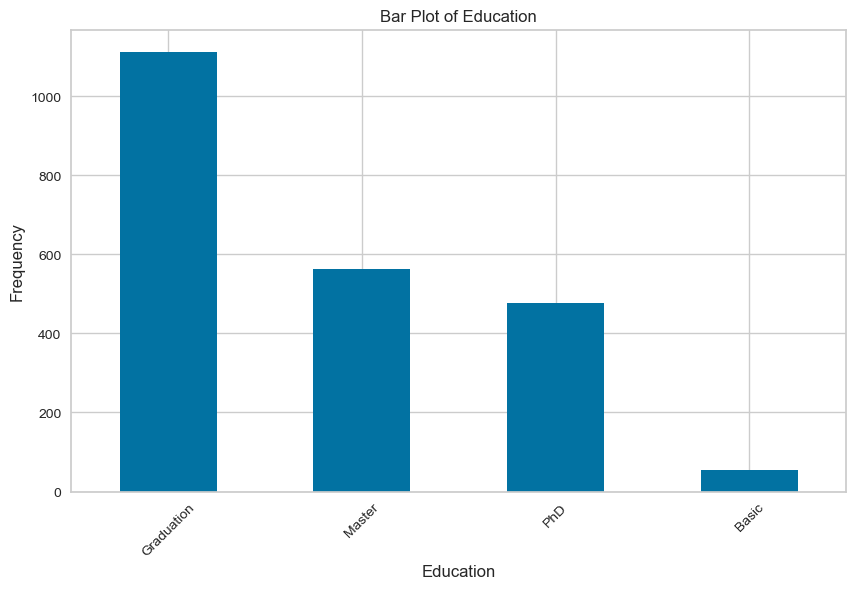

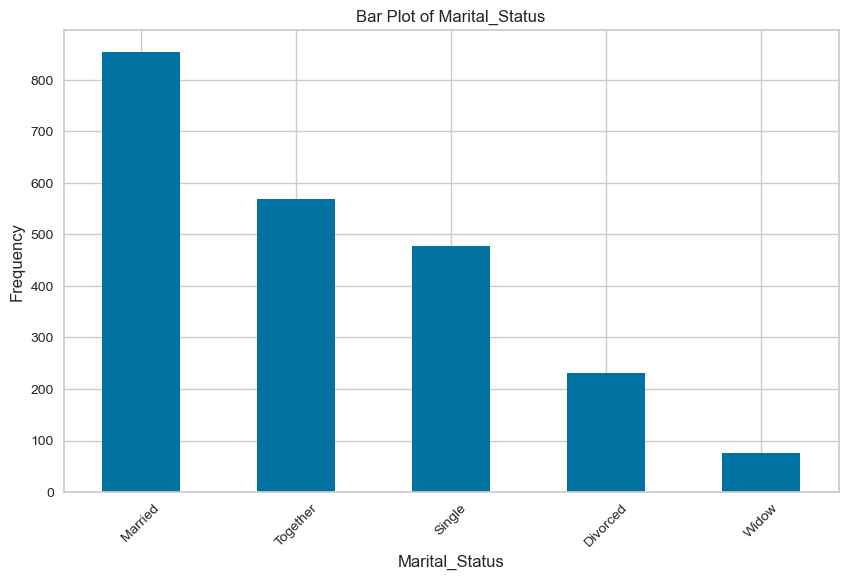

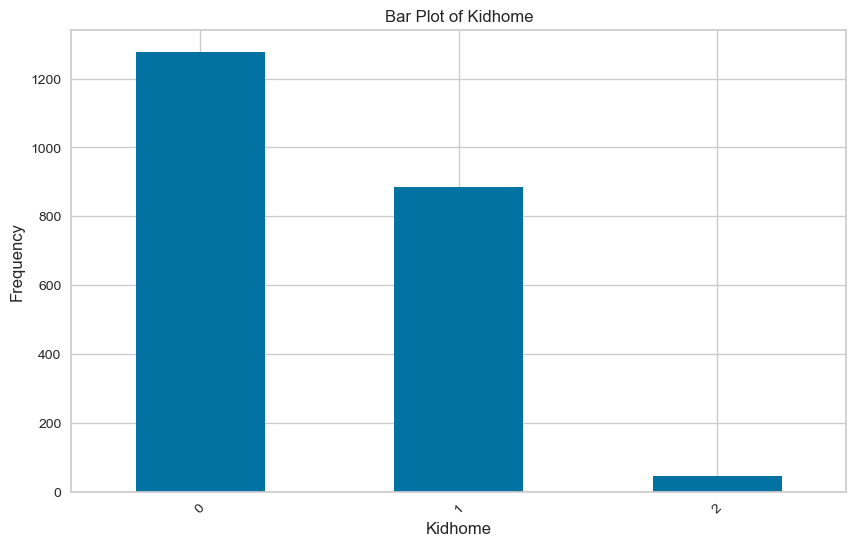

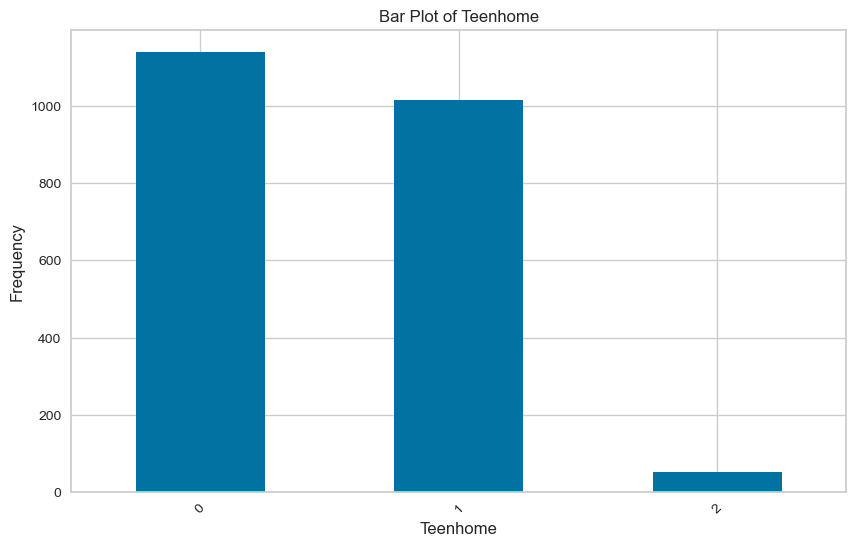

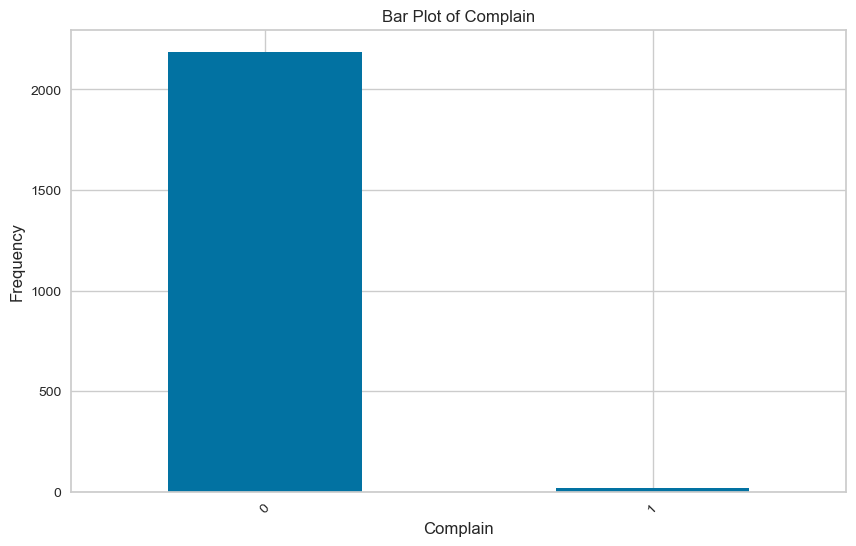

In [138]:
#categorical data 
column_name = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

for column_name in column_name:
    # Calculate the frequency of each category
    category_counts = df[column_name].value_counts()

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    category_counts.plot.bar()
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title("Bar Plot of {}".format(column_name))
    plt.xticks(rotation=45)
    plt.show()







The number of values in each column's each categories are all not equally distributed along the categories. 

### **Bivariate Analysis**

 - Analyze different categorical and numerical variables and check how different variables are related to each other.
 - Check the relationship of numerical variables with categorical variables.

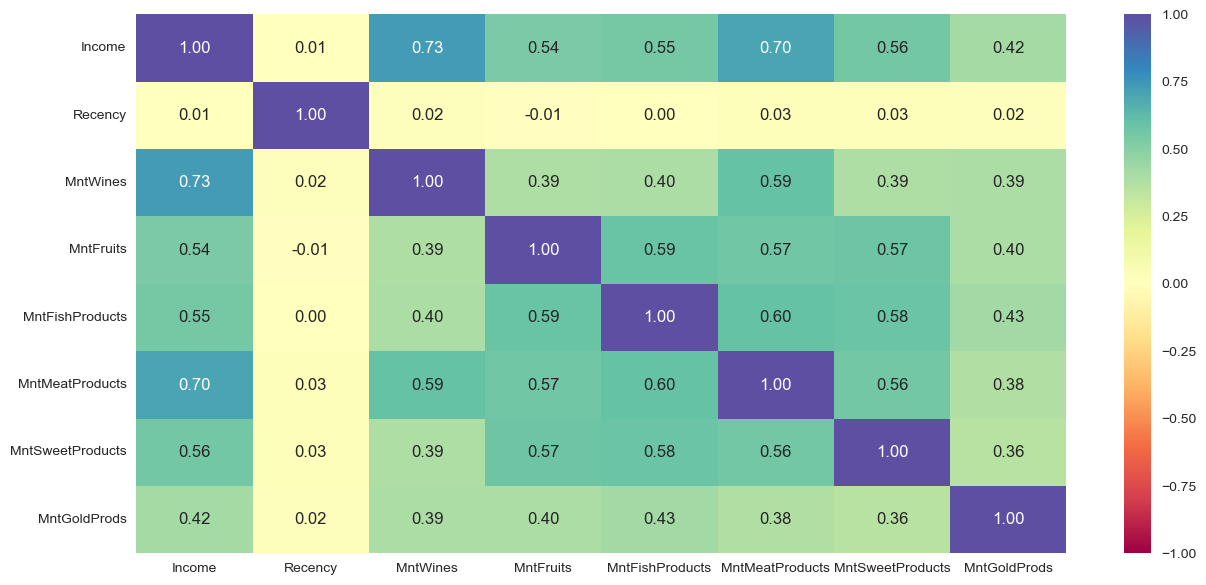

In [139]:
#correlation among numerical metrics 
#numerical dataset 
df_1=df[["Income", "Recency", "MntWines", "MntFruits", "MntFishProducts", "MntMeatProducts", "MntSweetProducts", "MntGoldProds"]]
plt.figure(figsize=(15, 7))                                                       
sns.heatmap(df_1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  
plt.show()

Recency and income's correlation is very slight 
The other 6 metrics' correlation with income are respectively strong.

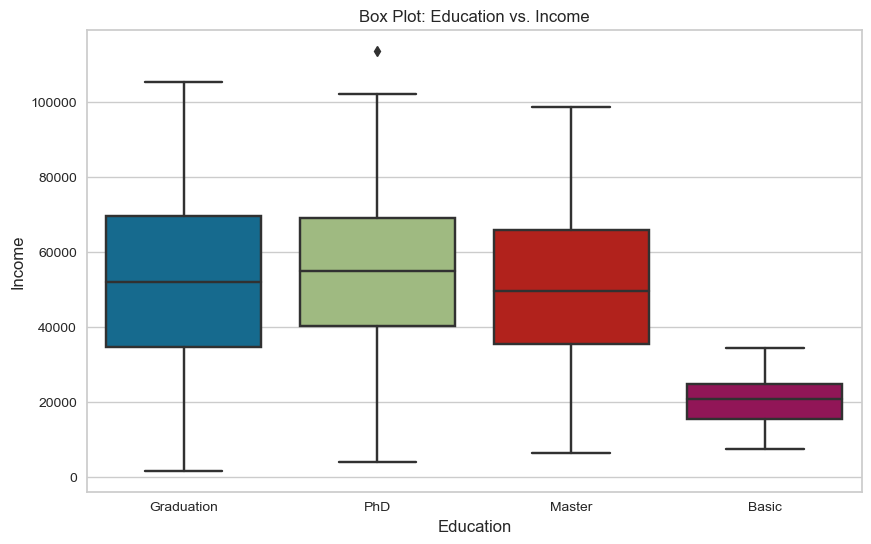

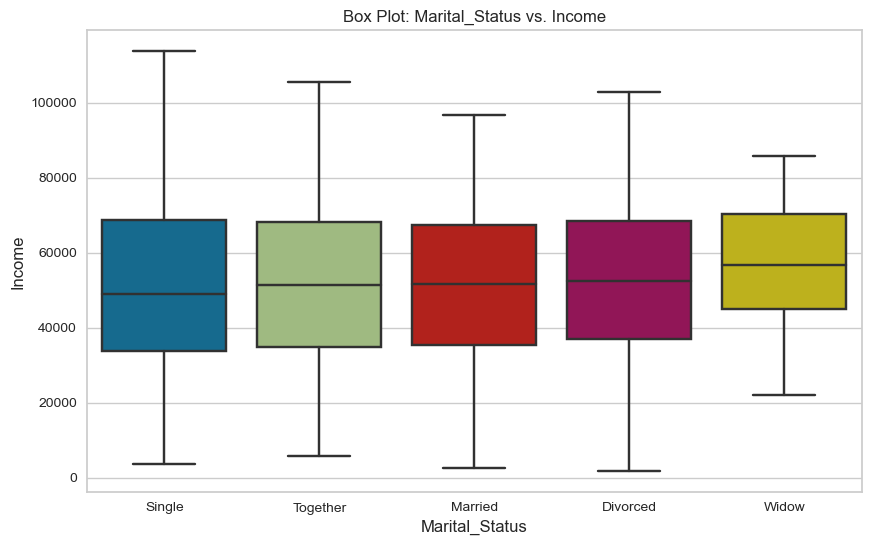

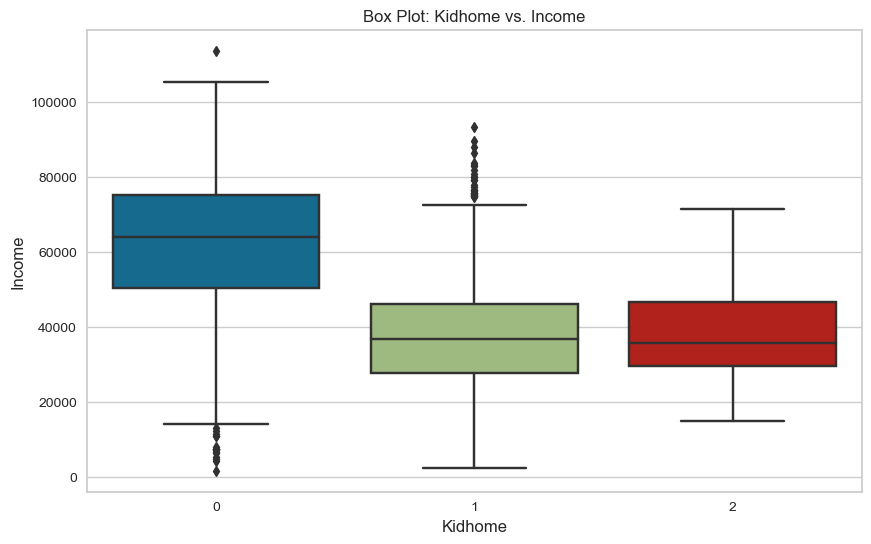

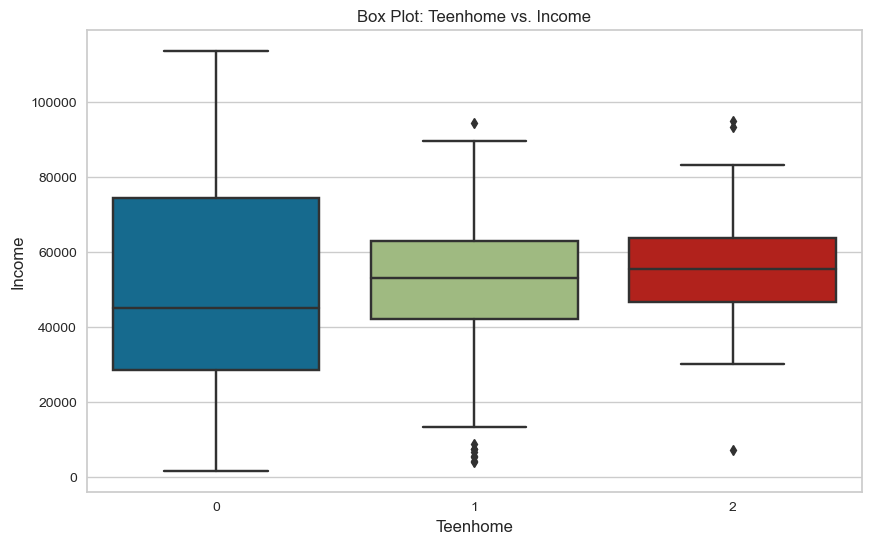

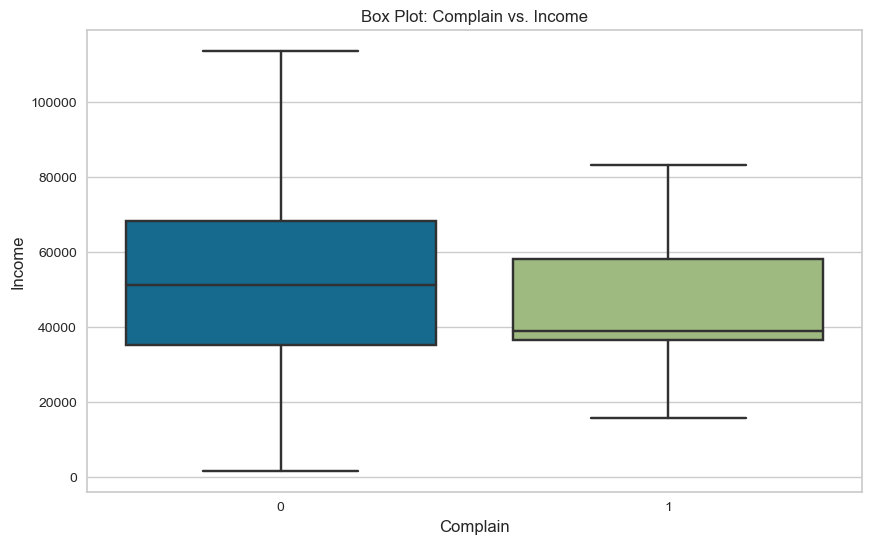

In [140]:
#categorical and numerical correlation 
#education & income ......

column_names = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

for column in column_names:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='Income', data=df)
    plt.xlabel(column)
    plt.ylabel('Income')
    plt.title('Box Plot: {} vs. Income'.format(column))
    plt.show()



The correlation between income and education is very obvious. The correlation between kidhome and income is also a little strong

### **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Imputing missing values

**Think About It:**

- Can we extract the age of each customer and create a new feature?
- Can we find the total kids and teens in the home?
- Can we find out how many members each family has?
- Can we find the total amount spent by the customers on various products?
- Can we find out how long the customer has been with the company?
- Can we find out how many offers the customers have accepted?
- Can we find out amount spent per purchase?



In [141]:
#Extract age
df["Age"] = 2016 - pd.to_datetime(df["Year_Birth"], format="%Y").dt.year

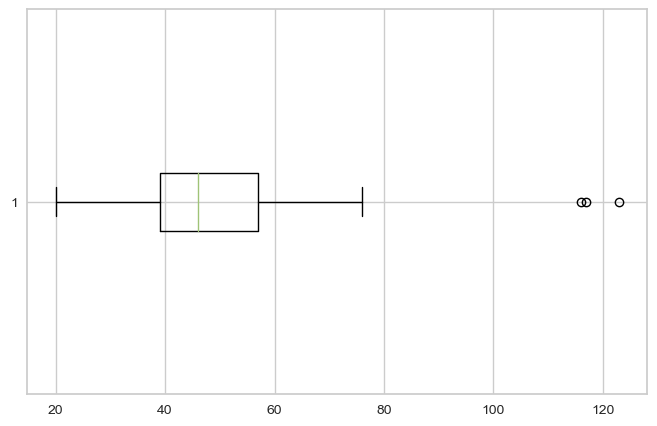

In [142]:
plt.figure(figsize=(8, 5))
plt.boxplot(df["Age"], vert=False)
plt.grid(True)
plt.show()

In [143]:
#it's easy to know we can drop the outlier
df = df[df['Age'] <= 100]

In [144]:
#total kid and teen
df['teen_kids'] = df['Kidhome'] + df['Teenhome']

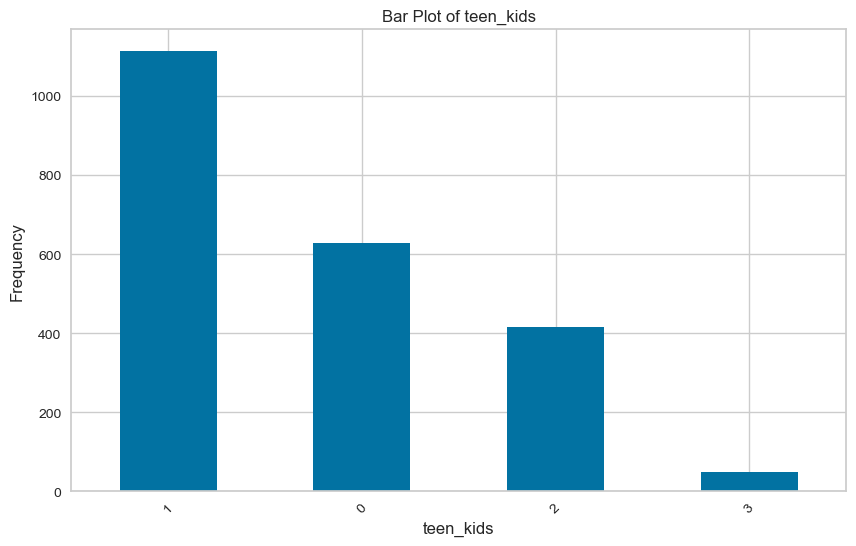

In [145]:
category_counts = df['teen_kids'].value_counts()
# Create the bar plot
plt.figure(figsize=(10, 6))
category_counts.plot.bar()
plt.xlabel('teen_kids')
plt.ylabel("Frequency")
plt.title("Bar Plot of {}".format('teen_kids'))
plt.xticks(rotation=45)
plt.show()

In [146]:
#Family Size
df['N_M'] = df['Marital_Status'].replace({'Single': 1, 'Divorced': 1, 'Widow': 1, 'Together': 2, 'Married': 2})
df['Family_Size']=df['N_M']+df['teen_kids']

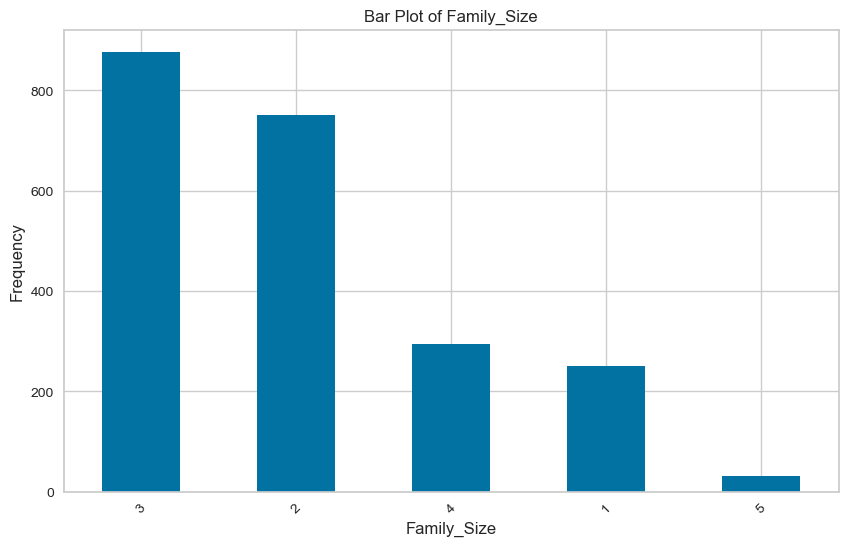

In [147]:
category_counts = df['Family_Size'].value_counts()
# Create the bar plot
plt.figure(figsize=(10, 6))
category_counts.plot.bar()
plt.xlabel('Family_Size')
plt.ylabel("Frequency")
plt.title("Bar Plot of {}".format('Family_Size'))
plt.xticks(rotation=45)
plt.show()

In [148]:
#Total amounts spent on all products 
df["T_P"]=df["MntWines"]+df["MntFruits"] +df["MntFishProducts"] +df["MntFishProducts"]+df["MntMeatProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

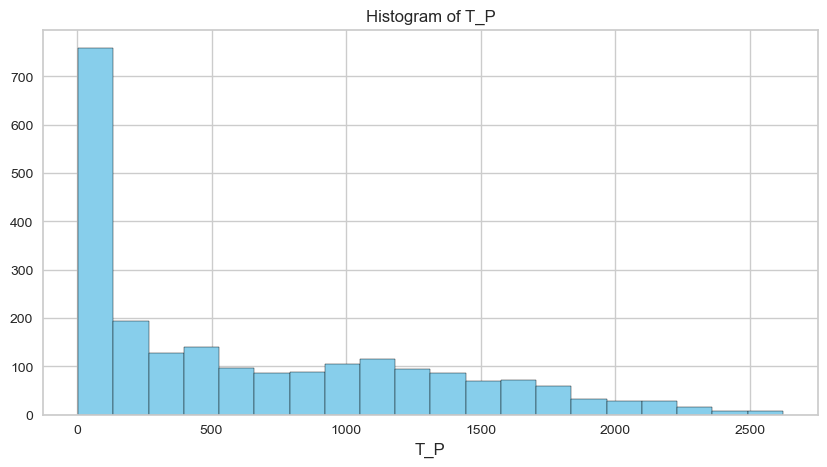

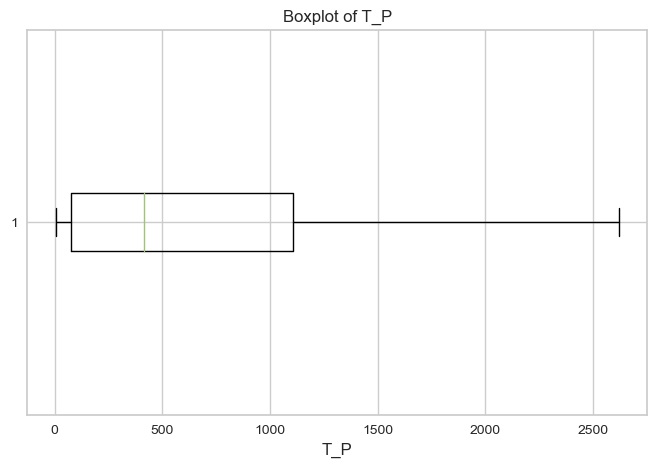

In [149]:
plt.figure(figsize=(10, 5))
plt.hist(df["T_P"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("T_P")
plt.title("Histogram of {}".format("T_P"))
plt.grid(True)
plt.show()

# Create a boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(df["T_P"], vert=False)
plt.xlabel("T_P")
plt.title("Boxplot of {}".format("T_P"))
plt.grid(True)
plt.show()

In [150]:
#the time the customer has been with the company
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"] )

df["Dt_Customer"].min()

Timestamp('2012-01-08 00:00:00')

In [151]:
df["Dt_Customer"].max()

Timestamp('2014-12-06 00:00:00')

In [152]:
df['days']='01-01-2015'
df["days"] = pd.to_datetime(df.days)              

In [153]:
df["Engaged_in_days"] = (df["days"] - df["Dt_Customer"]).dt.days    

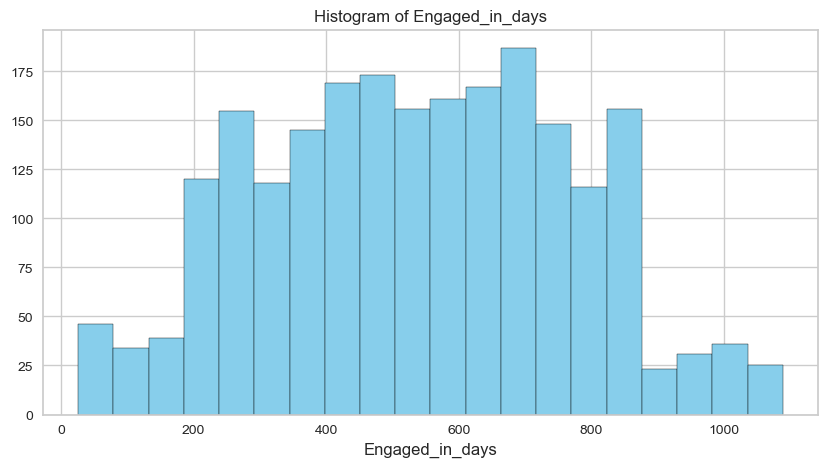

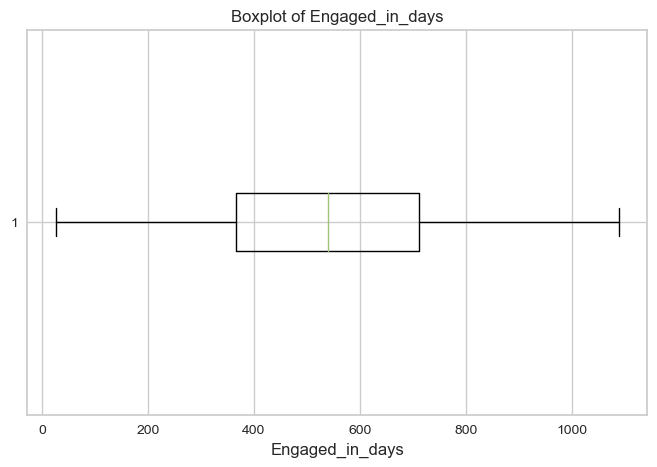

In [154]:
plt.figure(figsize=(10, 5))
plt.hist(df["Engaged_in_days"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Engaged_in_days")
plt.title("Histogram of {}".format("Engaged_in_days"))
plt.grid(True)
plt.show()

# Create a boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(df["Engaged_in_days"], vert=False)
plt.xlabel("Engaged_in_days")
plt.title("Boxplot of {}".format("Engaged_in_days"))
plt.grid(True)
plt.show()

for the engaged days data, no need to drop values 

In [155]:
#the offers the customers have accepted
df['T_offer']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

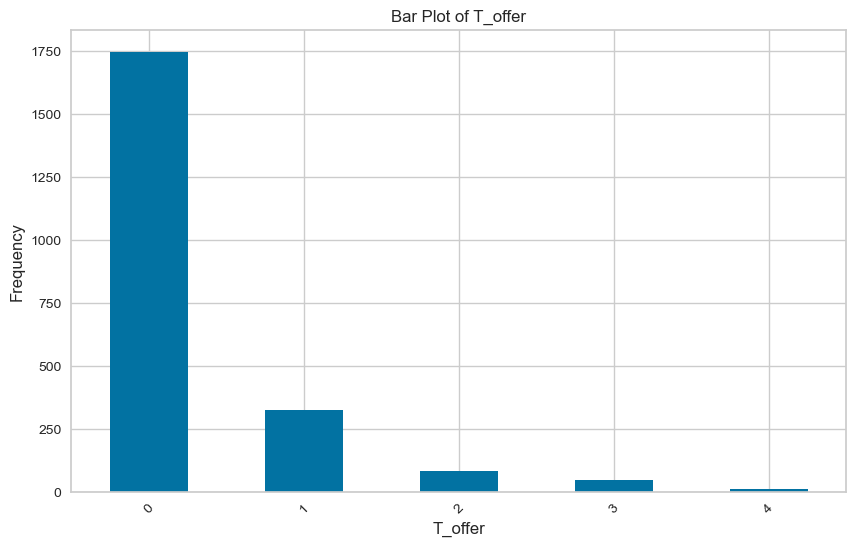

In [156]:
category_counts = df['T_offer'].value_counts()
# Create the bar plot
plt.figure(figsize=(10, 6))
category_counts.plot.bar()
plt.xlabel('T_offer')
plt.ylabel("Frequency")
plt.title("Bar Plot of {}".format('T_offer'))
plt.xticks(rotation=45)
plt.show()

In [157]:
#the amount spent per purchase?
df['Ave_spent']=(df["MntFishProducts"]+df["MntMeatProducts"]+df["MntFruits"]+df["MntSweetProducts"]+df["MntWines"]+df["MntGoldProds"])/(df["NumDealsPurchases"]+df["NumCatalogPurchases"]+df["NumStorePurchases"]+df["NumWebPurchases"]+df["NumWebVisitsMonth"])

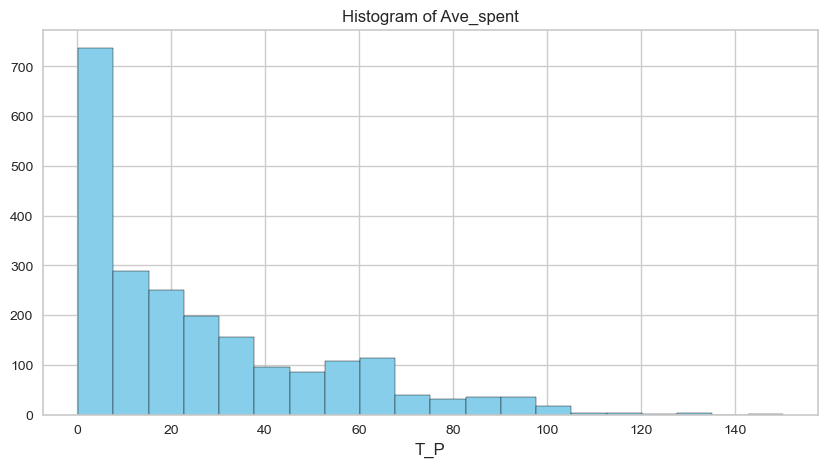

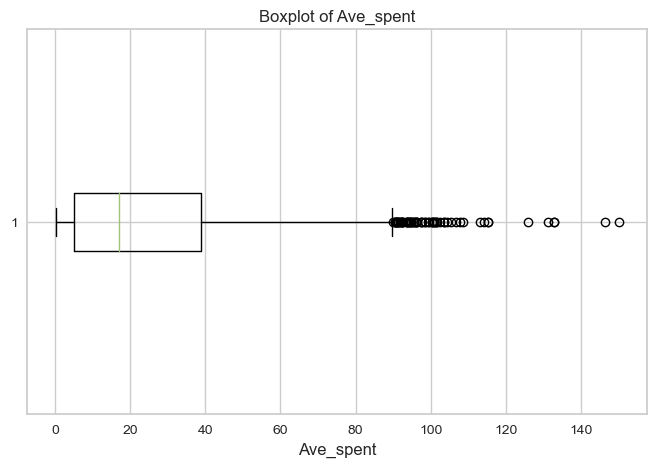

In [158]:
plt.figure(figsize=(10, 5))
plt.hist(df['Ave_spent'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("T_P")
plt.title("Histogram of {}".format('Ave_spent'))
plt.grid(True)
plt.show()

# Create a boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(df['Ave_spent'], vert=False)
plt.xlabel('Ave_spent')
plt.title("Boxplot of {}".format('Ave_spent'))
plt.grid(True)
plt.show()

In [159]:
#drop oytlier 
percentile_99_5 = df.quantile(q=0.995)['Ave_spent']
print(percentile_99_5)

107.72833333333335


In [160]:
df=df[df['Ave_spent']<100.5]

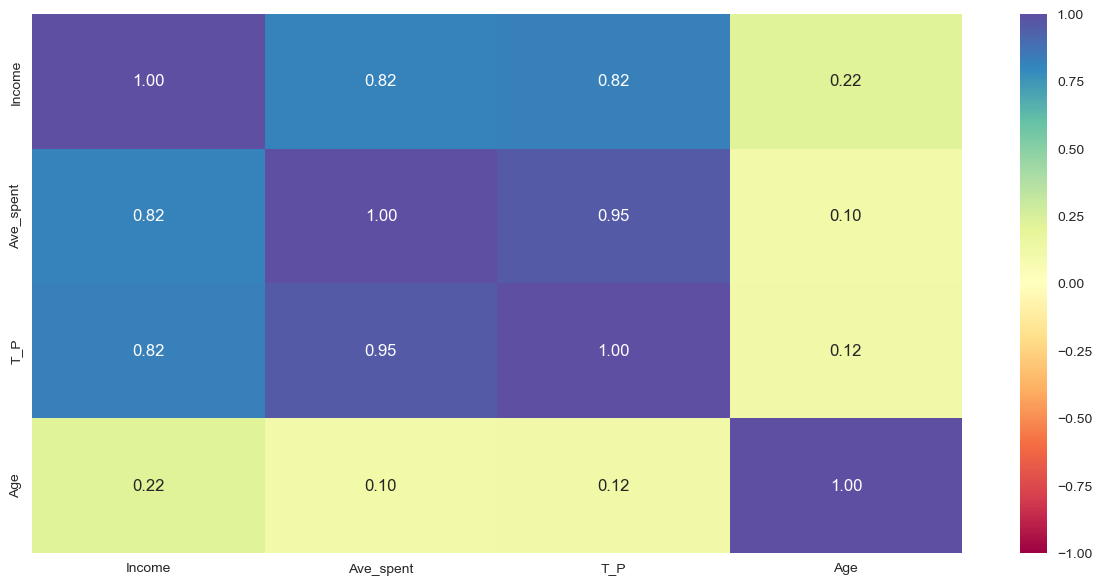

In [161]:
#correation 
#income & total spent & average spent & Age 
df_2=df[["Income", 'Ave_spent', "T_P", "Age"]]
plt.figure(figsize=(15, 7))                                                       
sns.heatmap(df_2.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  
plt.show()


The correlation between income and  total spent and spent on per purchase is strong but that is not strong with age. 

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Data Preparation for Segmentation**

- The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.
- Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.
- Plot the correlation plot after we've removed the irrelevant variables
- Scale the Data

#drop useless variable
According to the context and meanings of every data columns, I will drop the metrics used to generate new data and the irrelevant data towards consumption behaviors. 

In [164]:
# Dropping all the irrelevant columns and storing in data_model
df_model = df.drop(
    columns=[
        "Year_Birth",
        "Dt_Customer",
        "days",
        "Complain",
        "Response",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "Marital_Status",
        'Kidhome',
        'Teenhome',
        'Education'
    ],
    axis=1,
)

In [178]:
df_model = df_model.drop(
    columns=[
        'Age',
        "Income",
        'Family_Size',
        'teen_kids',
        'N_M'
        
    ],
    axis=1,
)

In [179]:
df_model.head()

Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth   T_P  \
0                   10                  4                  7  1789   
1                    1                  2                  5    29   
2                    2                 10                  4   887   
3                    0                  4                  6    63   
4                    3                  6                  5   468   

   Engaged_in_days  T_offer  Ave_spent  
0              997        0  50.531250  
1              151        0   2.454545  
2              498        0  31.040000  
3               91        0   3.785714  
4              347        0  17.583333

In [180]:
df_model.shape

(2181, 16)

In [181]:
#scalling data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_model)

df_scaled = pd.DataFrame(df_scaled, columns=df_model.columns)
df_scaled.head()


Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.309058  1.007634   1.596784         1.821832         2.497611   
1 -0.381679 -0.868779  -0.632932        -0.726685        -0.643624   
2 -0.796121  0.379156   0.597256        -0.155628         1.370462   
3 -0.796121 -0.868779  -0.556045        -0.660612        -0.495801   
4  1.552385 -0.381633   0.443483        -0.198103         0.169401   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          1.526472      0.875347           0.352052         1.416258   
1         -0.629833     -0.733069          -0.177483        -1.128706   
2         -0.134131     -0.026936          -0.707017         1.416258   
3         -0.580263     -0.752684          -0.177483        -0.765140   
4          0.014580     -0.556536           1.411120         0.325559   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       T_P  \
0             2.639556          -0.559648           0.677842  1.860959   
1            -0.579571          -1.175175          -0.159052 -0.962646   
2            -0.221890           1.286936          -0.577499  0.413862   
3            -0.937251          -0.559648           0.259395 -0.908099   
4             0.135791           0.055880          -0.159052 -0.258349   

   Engaged_in_days   T_offer  Ave_spent  
0         1.972492 -0.435102   1.049327  
1        -1.666385 -0.435102  -0.942815  
2        -0.173844 -0.435102   0.241673  
3        -1.924462 -0.435102  -0.887656  
4        -0.823336 -0.435102  -0.315928

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

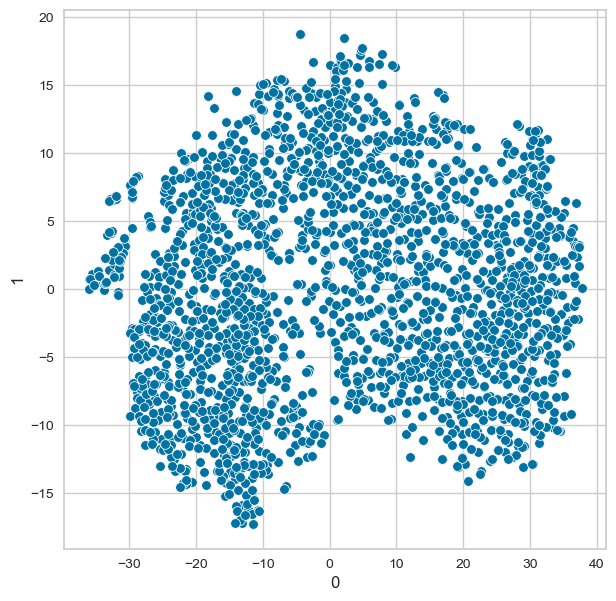

In [182]:
tsne = TSNE(n_components=2, random_state=5, perplexity=100)
df_tsne = tsne.fit_transform(df_scaled)

df_tsne = pd.DataFrame(df_tsne, columns=[0, 1])

plt.figure(figsize=(7, 7))
sns.scatterplot(x=0, y=1, data=df_tsne)
plt.show()


**Observation and Insights:**
There is no obvious group in the t-sne result. it's possible due to the complexity of data or the data's significant global structure. 

### **Applying PCA**

**Think about it:**
- Should we apply clustering algorithms on the current data or should we apply PCA on the data before applying clustering algorithms? How would this help?

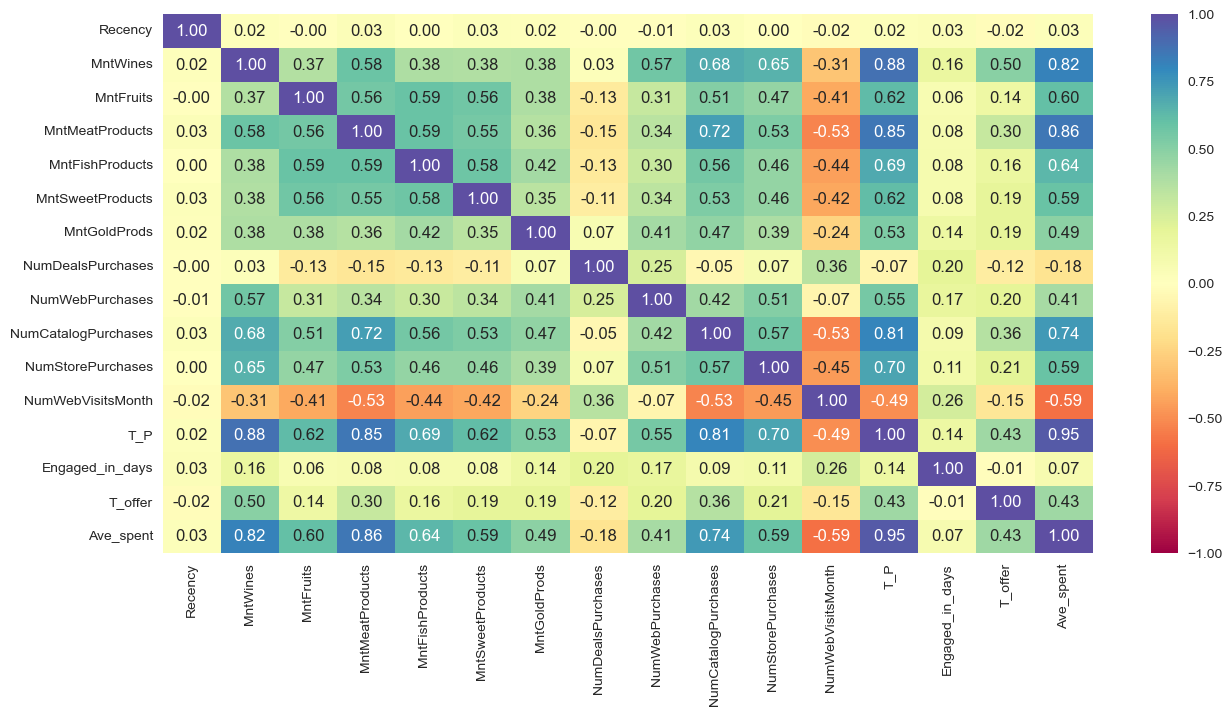

In [185]:
# the correlation in df_model
plt.figure(figsize=(15, 7))                                                       
sns.heatmap(df_model.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  
plt.show()

In [183]:
#There are exisiting correlation so we should use PCA to reduce multicollinearity.

n = df_scaled.shape[1]  

pca = PCA(n_components=n, random_state=1)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

exp_var = pca.explained_variance_ratio_



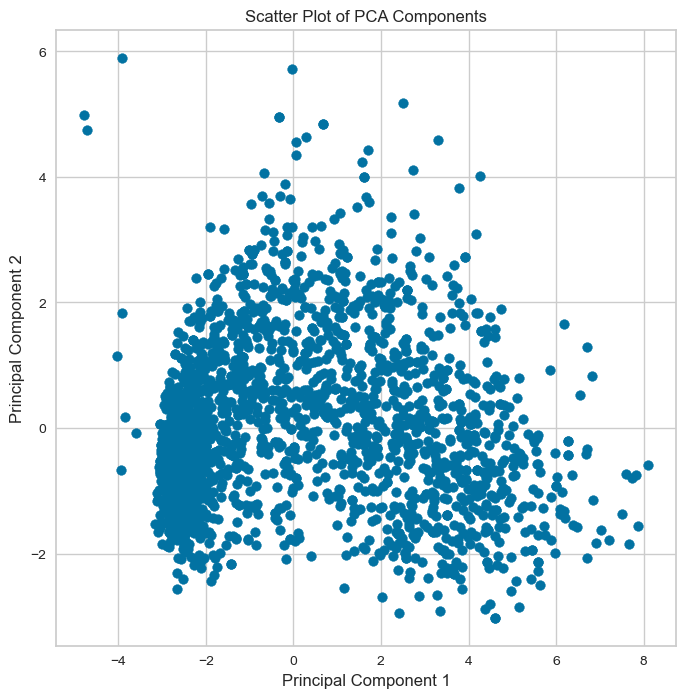

In [184]:
plt.figure(figsize=(8, 8))
plt.scatter(df_pca[0], df_pca[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA Components')
plt.show()


**Observation and Insights:** The PCA results also does not show obvious groups. 

## **K-Means** 

**Think About It:**

- How do we determine the optimal K value from the elbow curve?
- Which metric can be used to determine the final K value?

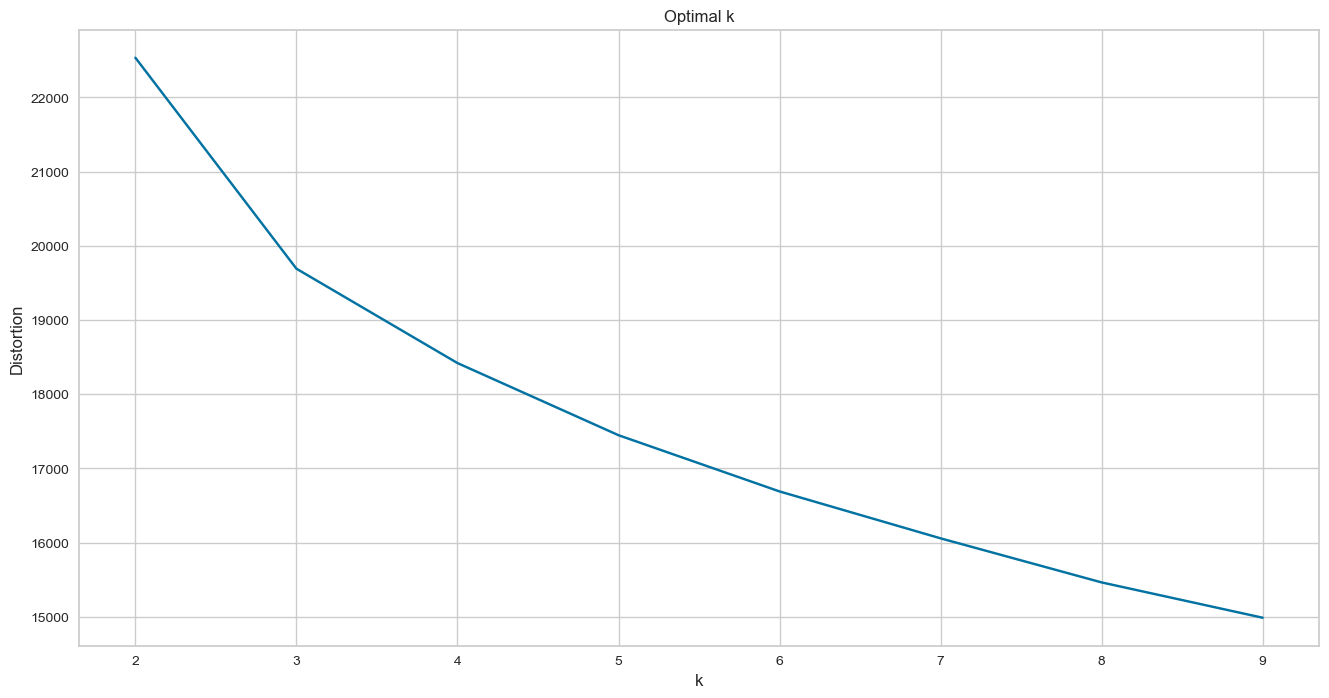

For n_clusters = 3, the silhouette score is 0.2642
For n_clusters = 4, the silhouette score is 0.2467
For n_clusters = 5, the silhouette score is 0.2287
For n_clusters = 6, the silhouette score is 0.1313


In [186]:
#we should see the sharply drop position in elbow plot 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

distortions = []
sil_scores = []
K = range(2, 10)

# Calculating distortions
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=4)
    kmeanModel.fit(df_pca)
    distortions.append(kmeanModel.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal k')
plt.show()

# Calculating silhouette scores
cluster_list = range(3, 7)

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict(df_pca)
    score = silhouette_score(df_pca, preds)
    sil_scores.append(score)
    print("For n_clusters = {}, the silhouette score is {:.4f}".format(n_clusters, score))


 The silhouette score is a measure of how well-defined the clusters are in a clustering analysis. The silhouette score ranges from -1 to 1, with higher values indicating better-defined and well-separated clusters.
Indicated by the graphix beyond, the sharply drop in the line is  k=3 and when k=3, the silhouetter score is bigges. So we choose 3 as k. 

### **Applying KMeans on the PCA data and visualize the clusters**

0    1053
2     589
1     539
Name: K_means, dtype: int64


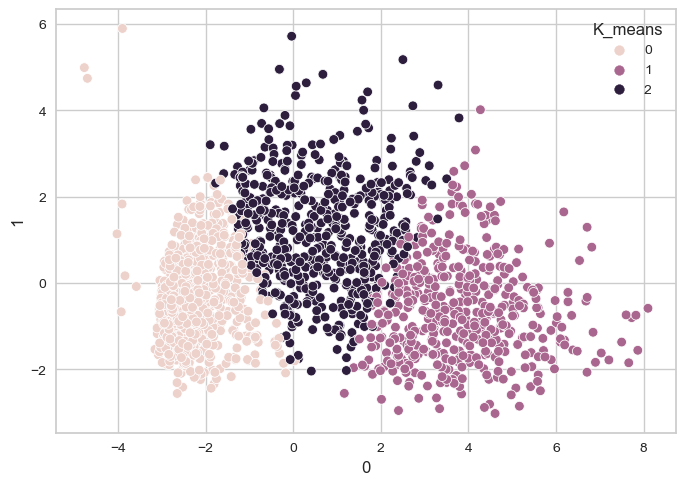

In [188]:
kmeans = KMeans(n_clusters=3, random_state=1)  # Initialize the K-Means algorithm with 3 clusters and random_state=1

kmeans.fit(df_pca)  # Fitting the K-Means algorithm on the data_pca

df_pca["K_means"] = kmeans.labels_  # Adding K-Means cluster labels to the data_pca dataframe

df["K_means"] = kmeans.labels_  # Adding K-Means cluster labels to the whole data dataframe

df_model["K_means"] = kmeans.labels_  # Adding K-Means cluster labels to the df_model dataframe

# Check the distribution of the K-Means cluster labels
print(df_model["K_means"].value_counts())

# Function to visualize PCA data with clusters formed
def pca_plot(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=Y, data=PCA, hue=cluster)

pca_plot(0, 1, df_pca, "K_means")


### **Cluster Profiling**

In [189]:
cluster_profile_KMeans_3 = df.groupby('K_means').mean()

# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_3.style.highlight_max(color="lightgreen", axis=0)


In [191]:
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts',
               'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases',
               'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','T_P',
               'Engaged_in_days','T_offer','Ave_spent']

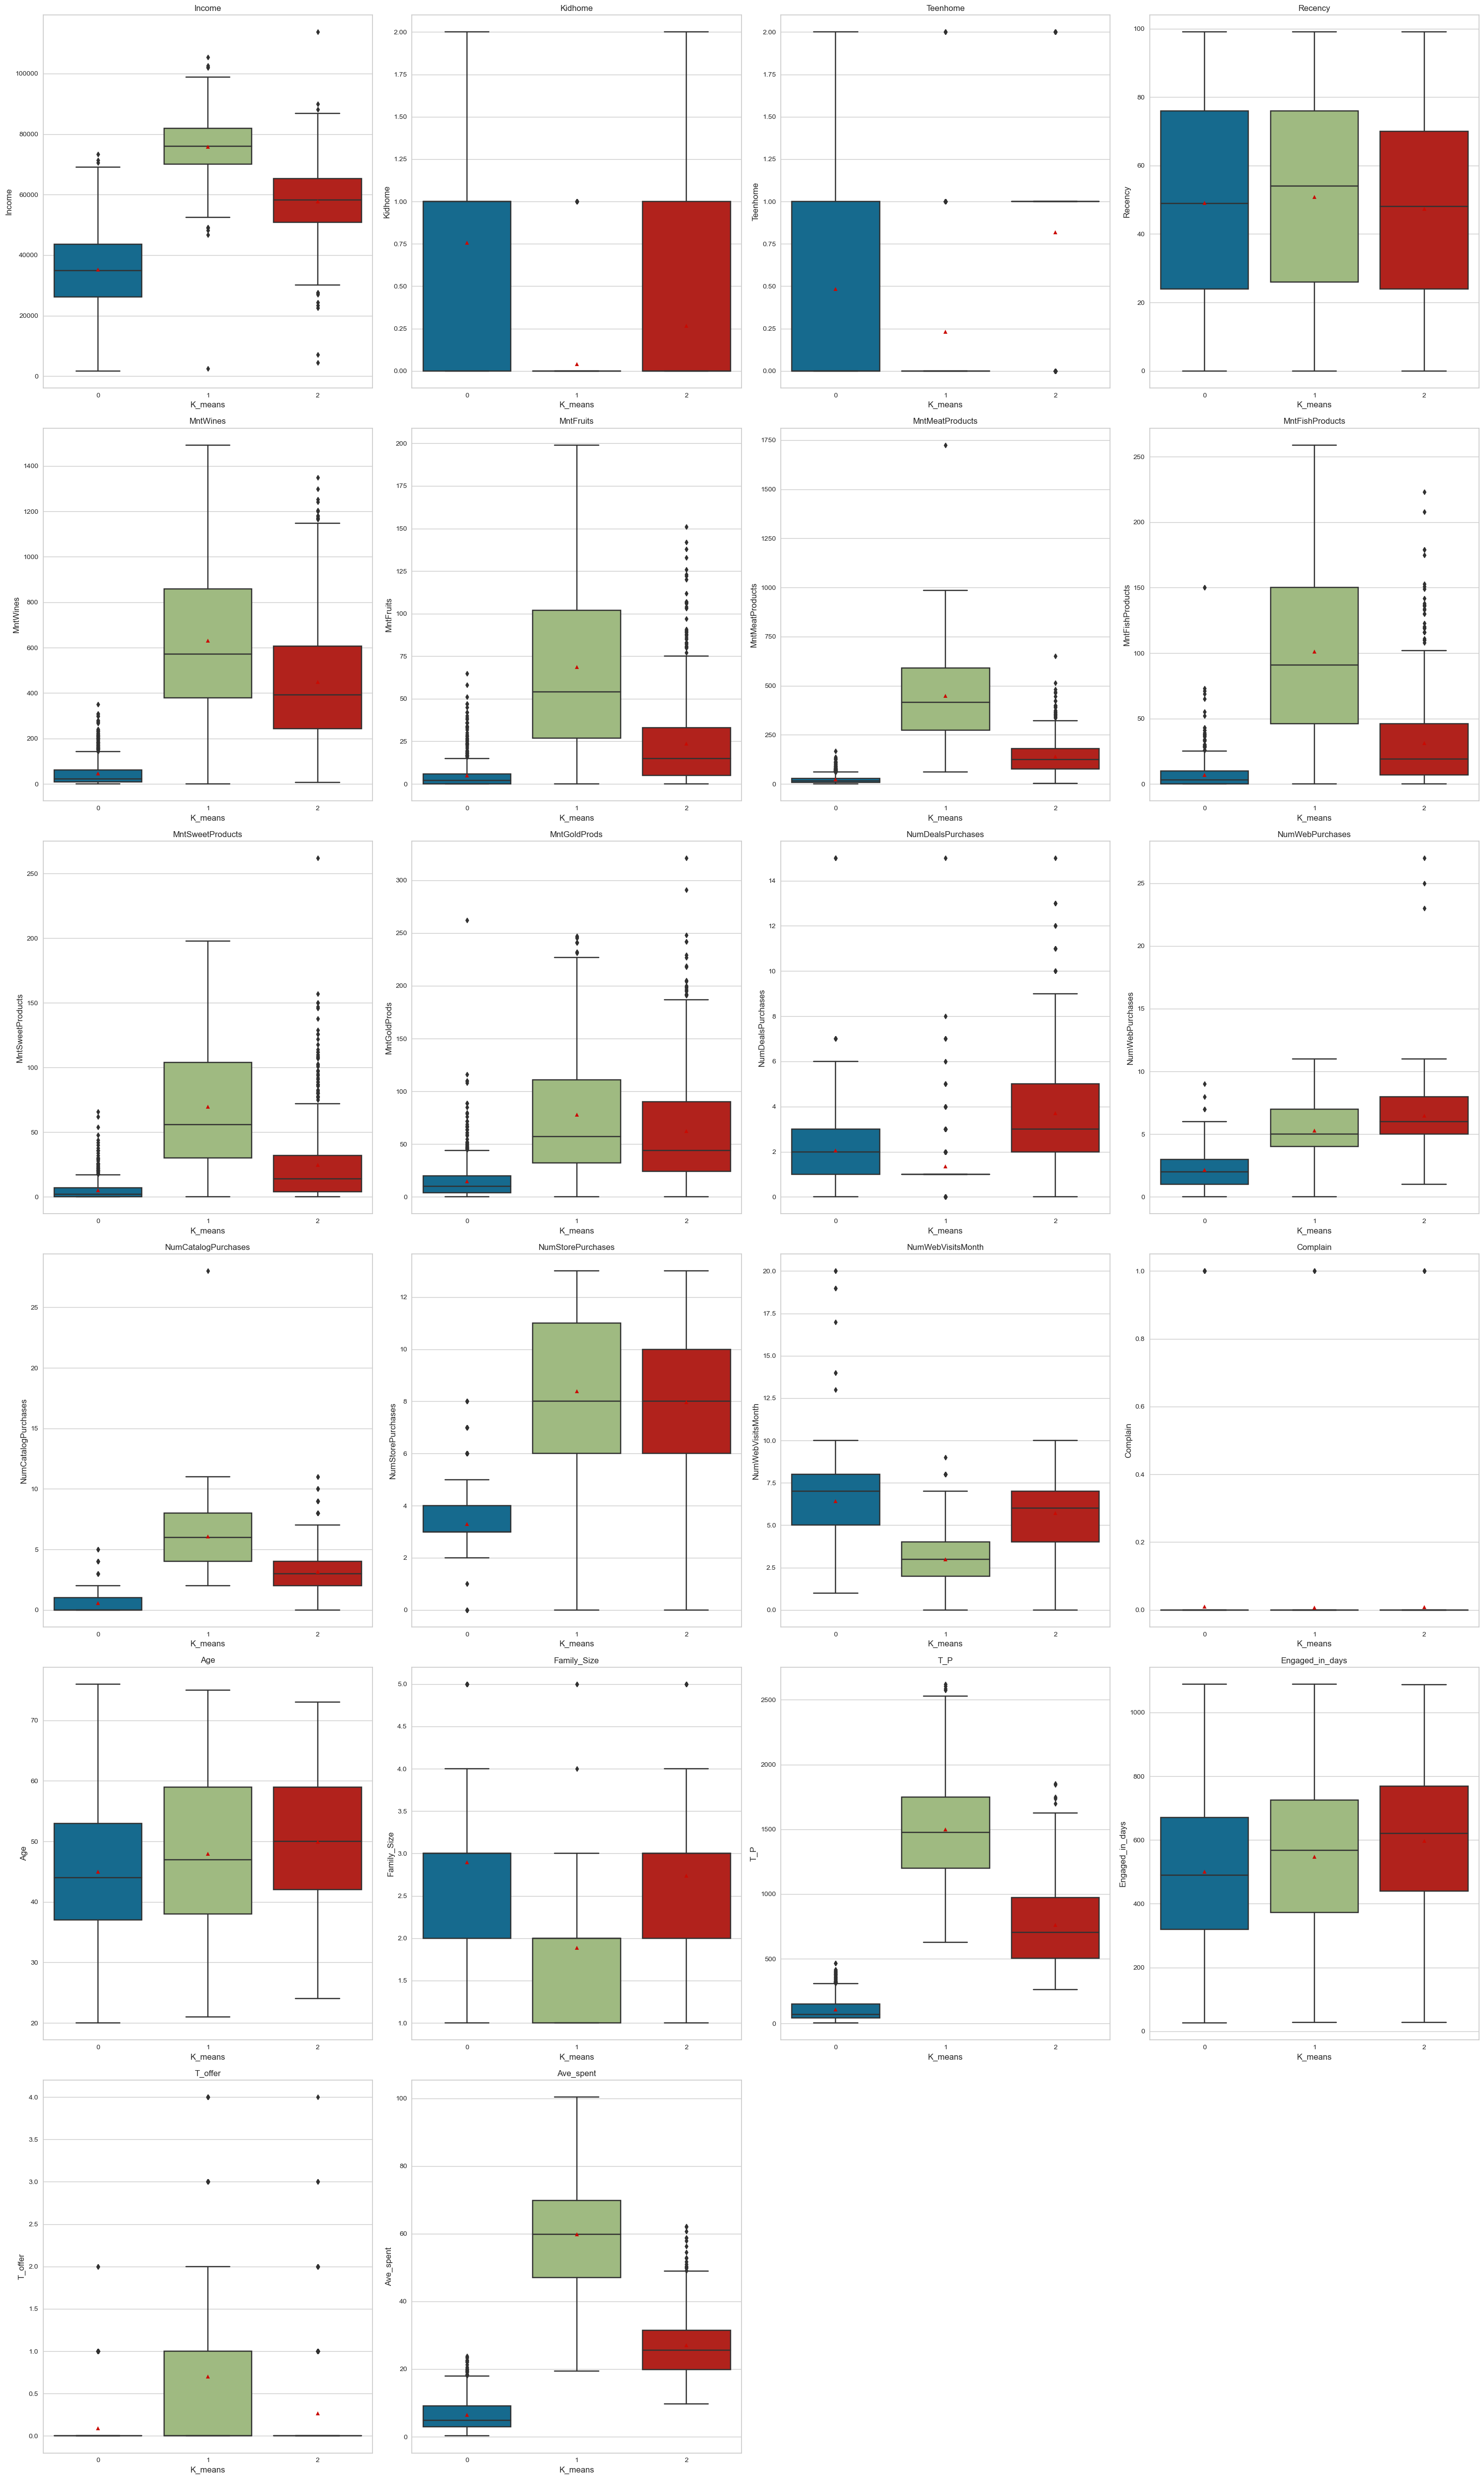

In [193]:
all_col = col_for_box

plt.figure(figsize=(30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=df[variable], x=df['K_means'], showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()


**Observations and Insights:**
**Cluster 0:The all metrics relevant to money spent are all respectively lower than the other two groups. Famely size, the number of kids of group 0, rather, are higher than that of group 1. This group show more frequency purchase in web but lower in store. 

**Cluster 1: The income of group 1 and other metrics related to spent of money are outstanding than the other groups. Meanwhile, the family size and number of kids and teens are respectively lower. About shopping category, this high income group show higher in all categories. 


**Cluster 2:This group's income, spent are in the middle of group 0 and group 1.On the metrics of total number of purchase, engaged in days, group 2 holds the highest values. In all categories, only the consuption on wines of group 2 is obviousely higher than that of group 0. The other categories all do not differentiate obviousely. 

### **Describe the characteristics of each cluster**

**Think About It:**
- Are the K-Means profiles providing any deep insights into customer purchasing behavior or which channels they are using?
- What is the next step to get more meaningful insights? 

**Summary of each cluster:**
After the K-Means model, the results can show insights of the relation between income and total purchase spent, average purchase spent and category preference. However, the insights about concrete purchase behaviors about  shopping channels are not enough. We only know that the low income and low spent group 0 prefer online shopping more. But we cannot divide group1 and group2's purchase behaviors about store and web. 

## **K-Medoids**

In [194]:

# Fit K-Medoids on the data_pca
kmedoids = KMedoids(n_clusters=3, random_state=1)
kmedoids.fit(df_pca)

# Add K-Medoids cluster labels to the data_pca
df_pca['K_medoids'] = kmedoids.labels_

# Add K-Medoids cluster labels to the whole data
df['K_medoids'] = kmedoids.labels_
df_model['K_medoids'] = kmedoids.labels_




### **Visualize the clusters using PCA**

3    602
4    527
2    449
1    340
0    263
Name: K_medoids, dtype: int64


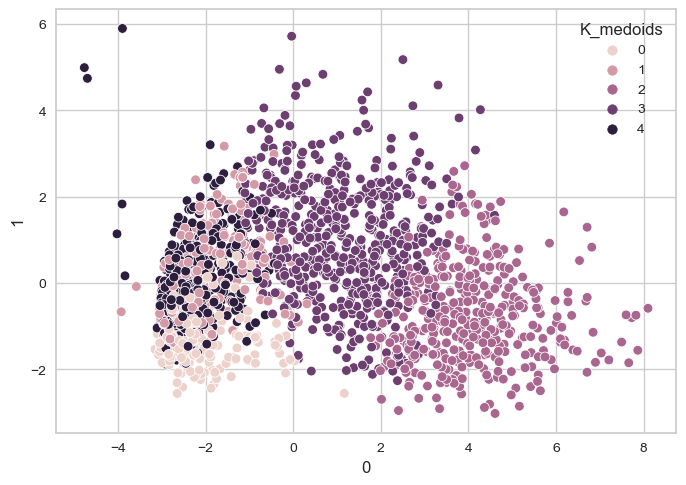

In [198]:
kmedoids = KMedoids(n_clusters=5, random_state=1)  # Initialize the K-Means algorithm with 3 clusters and random_state=1

kmedoids.fit(df_pca)  # Fitting the K-Means algorithm on the data_pca

df_pca["K_medoids"] = kmedoids.labels_  # Adding K-Means cluster labels to the data_pca dataframe

df["K_medoids"] = kmedoids.labels_  # Adding K-Means cluster labels to the whole data dataframe

df_model["K_medoids"] = kmedoids.labels_  # Adding K-Means cluster labels to the df_model dataframe

# Check the distribution of the K-Means cluster labels
print(df_model["K_medoids"].value_counts())

# Function to visualize PCA data with clusters formed
def pca_plot(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=Y, data=PCA, hue=cluster)

pca_plot(0, 1, df_pca, "K_medoids")

### **Cluster Profiling**

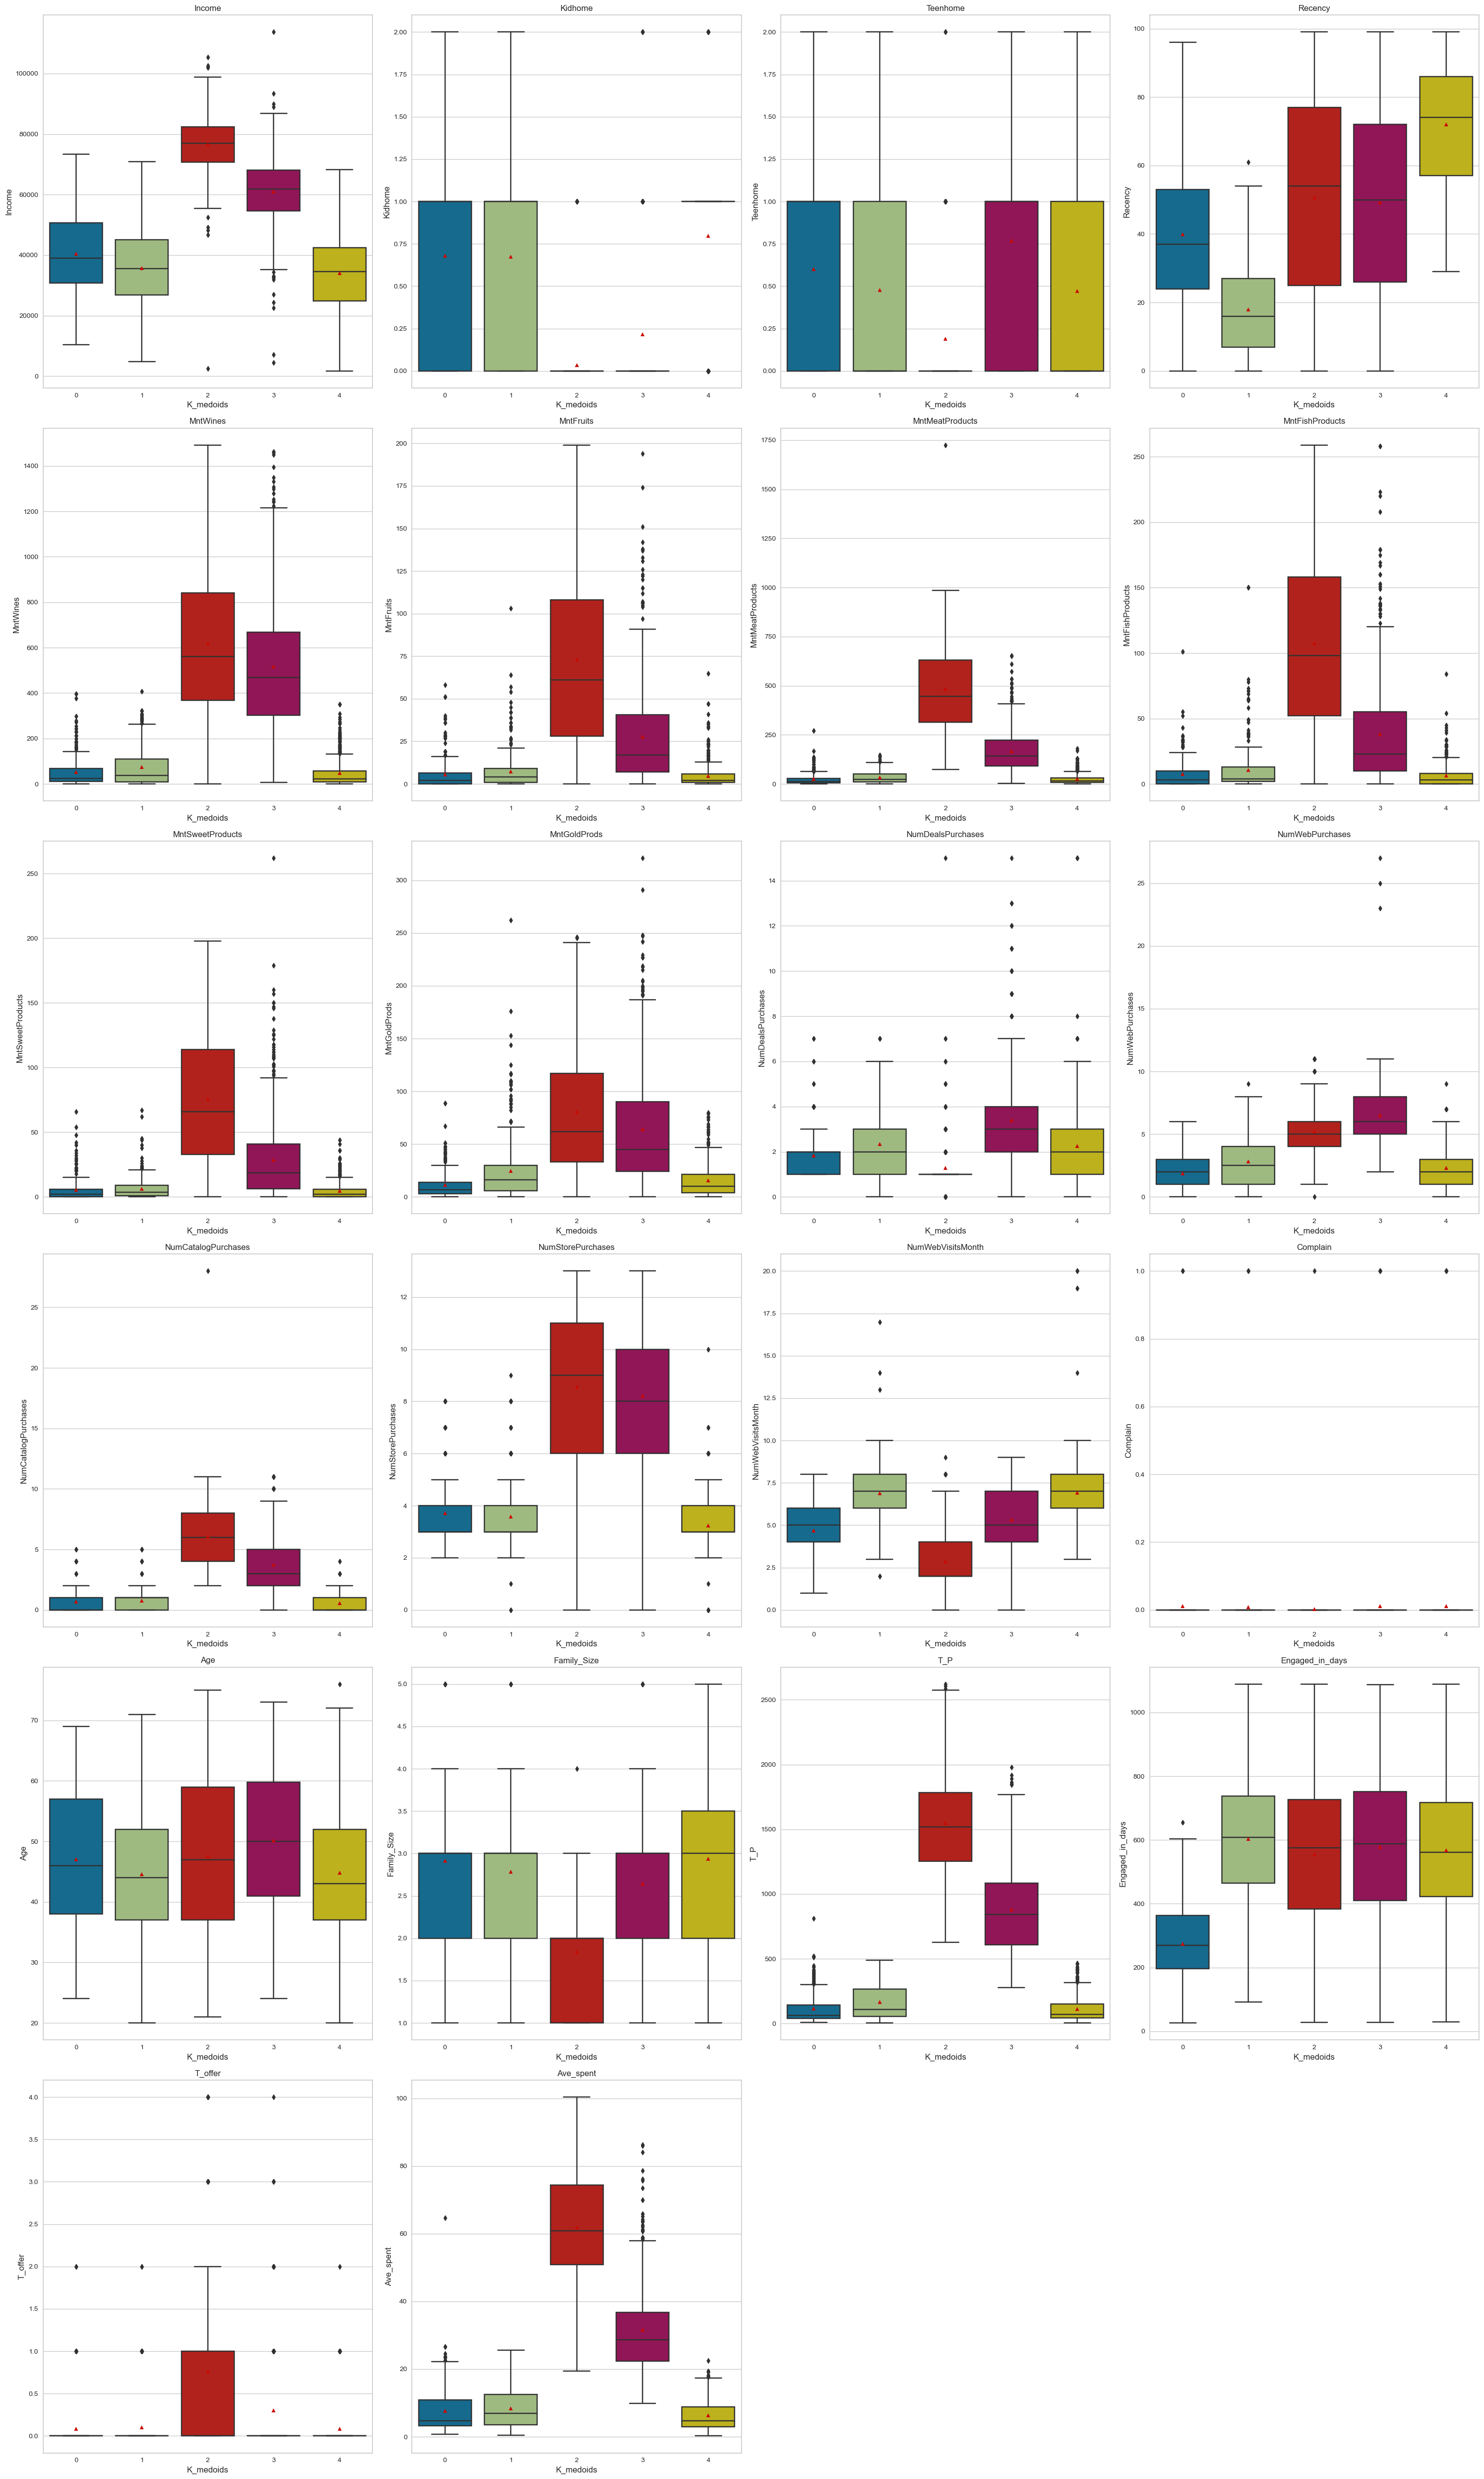

In [199]:
all_col = col_for_box

plt.figure(figsize=(30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=df[variable], x=df['K_medoids'], showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observations and Insights:** 
The K-Medoids's clustering plot show less seperate groups. This model does not perform better than the K-Means. So I consider to increase the clusters number from 3 to 5. The results perform more concretely. 

### **Characteristics of each cluster**

**Summary for each cluster:**
The cluster 0, 1 and 4 show similar income and similar money spent. 

Differently, the group 2 holds highest income and money spent in all categories.Its store purchase number is highest while the web purchase number is also not very low still higher than group 0,1,4 just a little lower than group 3. 

Group 3 is the second highest income groups. The all kinds of spent are just lower than group 2. Its number of web purchase and purchase with discount are highest.

Group 4 performs all similar with group 0, and 1 except for recency. It holds the highest recency. 

**Observations and Insights:**

## **Hierarchical Clustering**

- Find the Cophenetic correlation for different distances with different linkage methods.
- Create the dendrograms for different linkages 
- Explore different linkages with each distance metric

In [202]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average"]

high_cophenet_corr = 0                                                 # Creating a variable by assigning 0 to it
high_dm_lm = [0, 0]                                                    # Creating a list by assigning 0's to it

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_pca, metric=dm, method=lm)                    # Applying different linkages with different distance on data_pca
        c, coph_dists = cophenet(Z, pdist(df_pca))                   # Calculating cophenetic correlation
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:                                     # Checking if cophenetic correlation is higher than previous score
            high_cophenet_corr = c                                     # Appending to high_cophenet_corr list if it is higher
            high_dm_lm[0] = dm                                         # Appending its corresponding distance
            high_dm_lm[1] = lm                                         # Appending its corresponding method or linkage

Cophenetic correlation for Euclidean distance and single linkage is 0.7421043730773603.
Cophenetic correlation for Euclidean distance and complete linkage is 0.743935579491151.
Cophenetic correlation for Euclidean distance and average linkage is 0.825869717083249.
Cophenetic correlation for Chebyshev distance and single linkage is 0.6199886993878446.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6780365866640657.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7837636545136272.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.646783195841968.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.4068511118435712.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6429122106409195.
Cophenetic correlation for Cityblock distance and single linkage is 0.7623031715969052.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7769576385866048.
Cophenetic correla

In [203]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.825869717083249, which is obtained with Euclidean distance and average linkage.


Therefore, we use the highest cophenetic correlation, Euclidean distance and average linkage. 

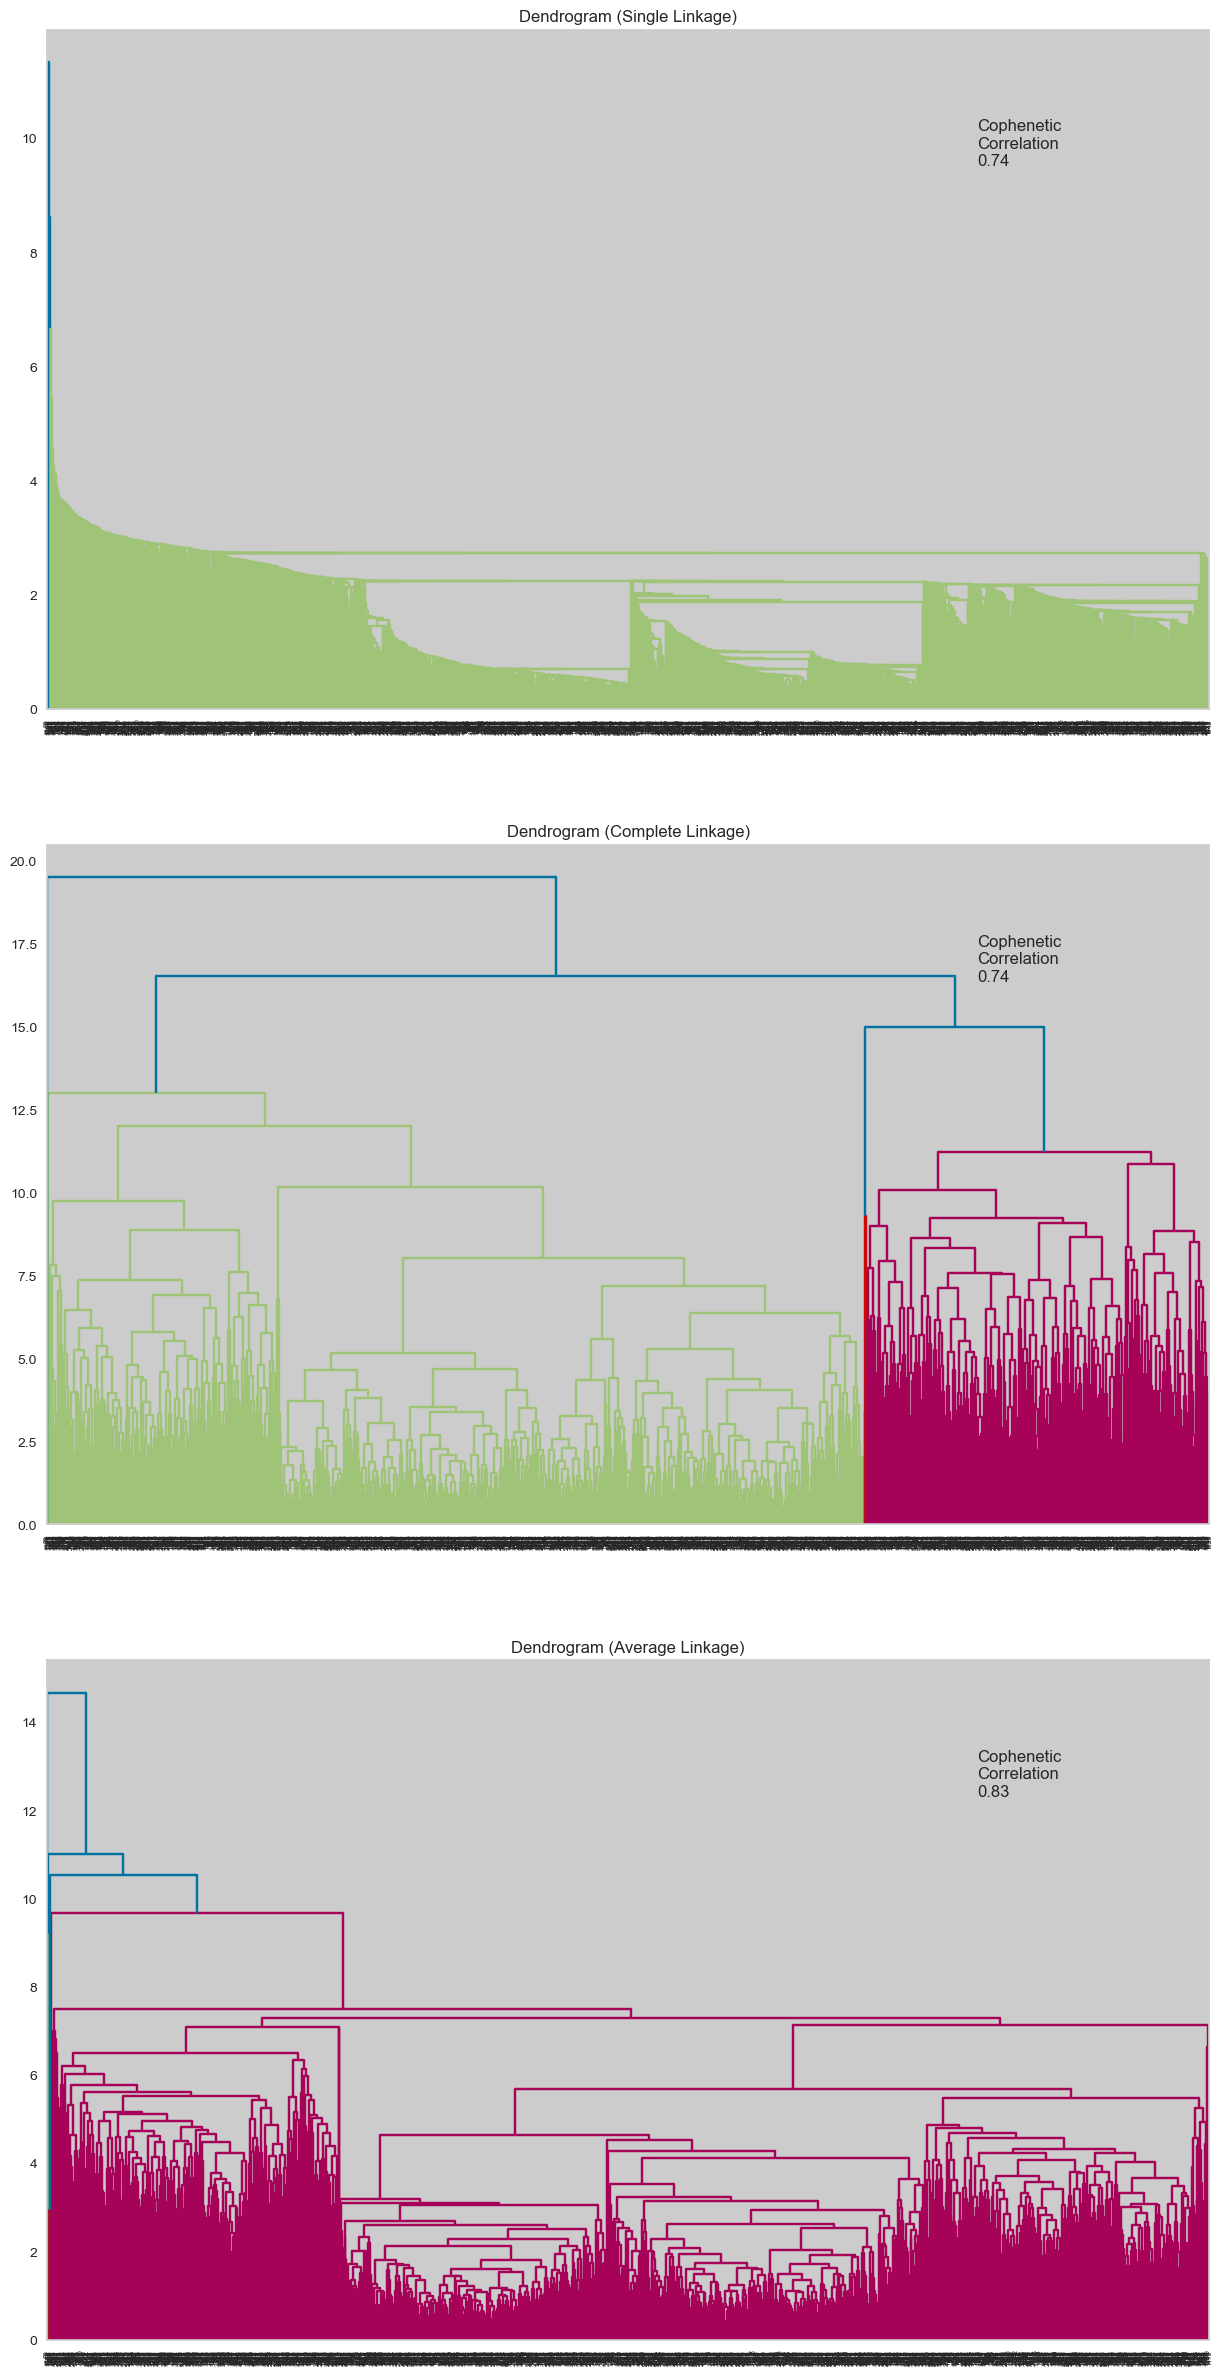

In [205]:
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_pca, metric="Euclidean", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(df_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Seen from the three pictures beyond, indeed, the second one with parameter of complete linkage look best although it with not the highest cophenetic value. 

**Think about it:**

- Can we clearly decide the number of clusters based on where to cut the dendrogram horizontally?
- What is the next step in obtaining number of clusters based on the dendrogram?
- Are there any distinct clusters in any of the dendrograms?

### **Visualize the clusters using PCA**

In [207]:
df_pca.columns = df_pca.columns.astype(str)

0    1050
1     629
2     502
Name: Agglomerative_Clusters, dtype: int64


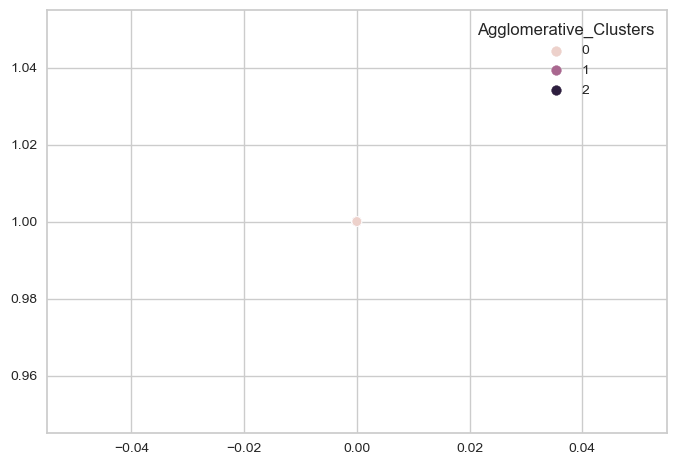

In [215]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")

# Fit on data_pca
HCmodel.fit(df_pca)

# Add Agglomerative Clustering cluster labels to data_pca
df_pca["Agglomerative_Clusters"] = HCmodel.labels_

# Add Agglomerative Clustering cluster labels to the whole data
df["Agglomerative_Clusters"] = HCmodel.labels_
df_model["Agglomerative_Clusters"] = HCmodel.labels_

print(df_model["Agglomerative_Clusters"].value_counts())

def pca_plot(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=Y, data=PCA, hue=cluster)

pca_plot(0, 1, df_pca, "Agglomerative_Clusters")


There is a wierred problem that if we use any linkage of single,complete and average. Almost all data will concentrate in one group only we use ward, the number three groups' data points can be more balance.  

### **Cluster Profiling**

In [216]:
cluster_profile_Agglomerative_Clusters = df.groupby('Agglomerative_Clusters').mean()

# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_Agglomerative_Clusters.style.highlight_max(color="lightgreen", axis=0)


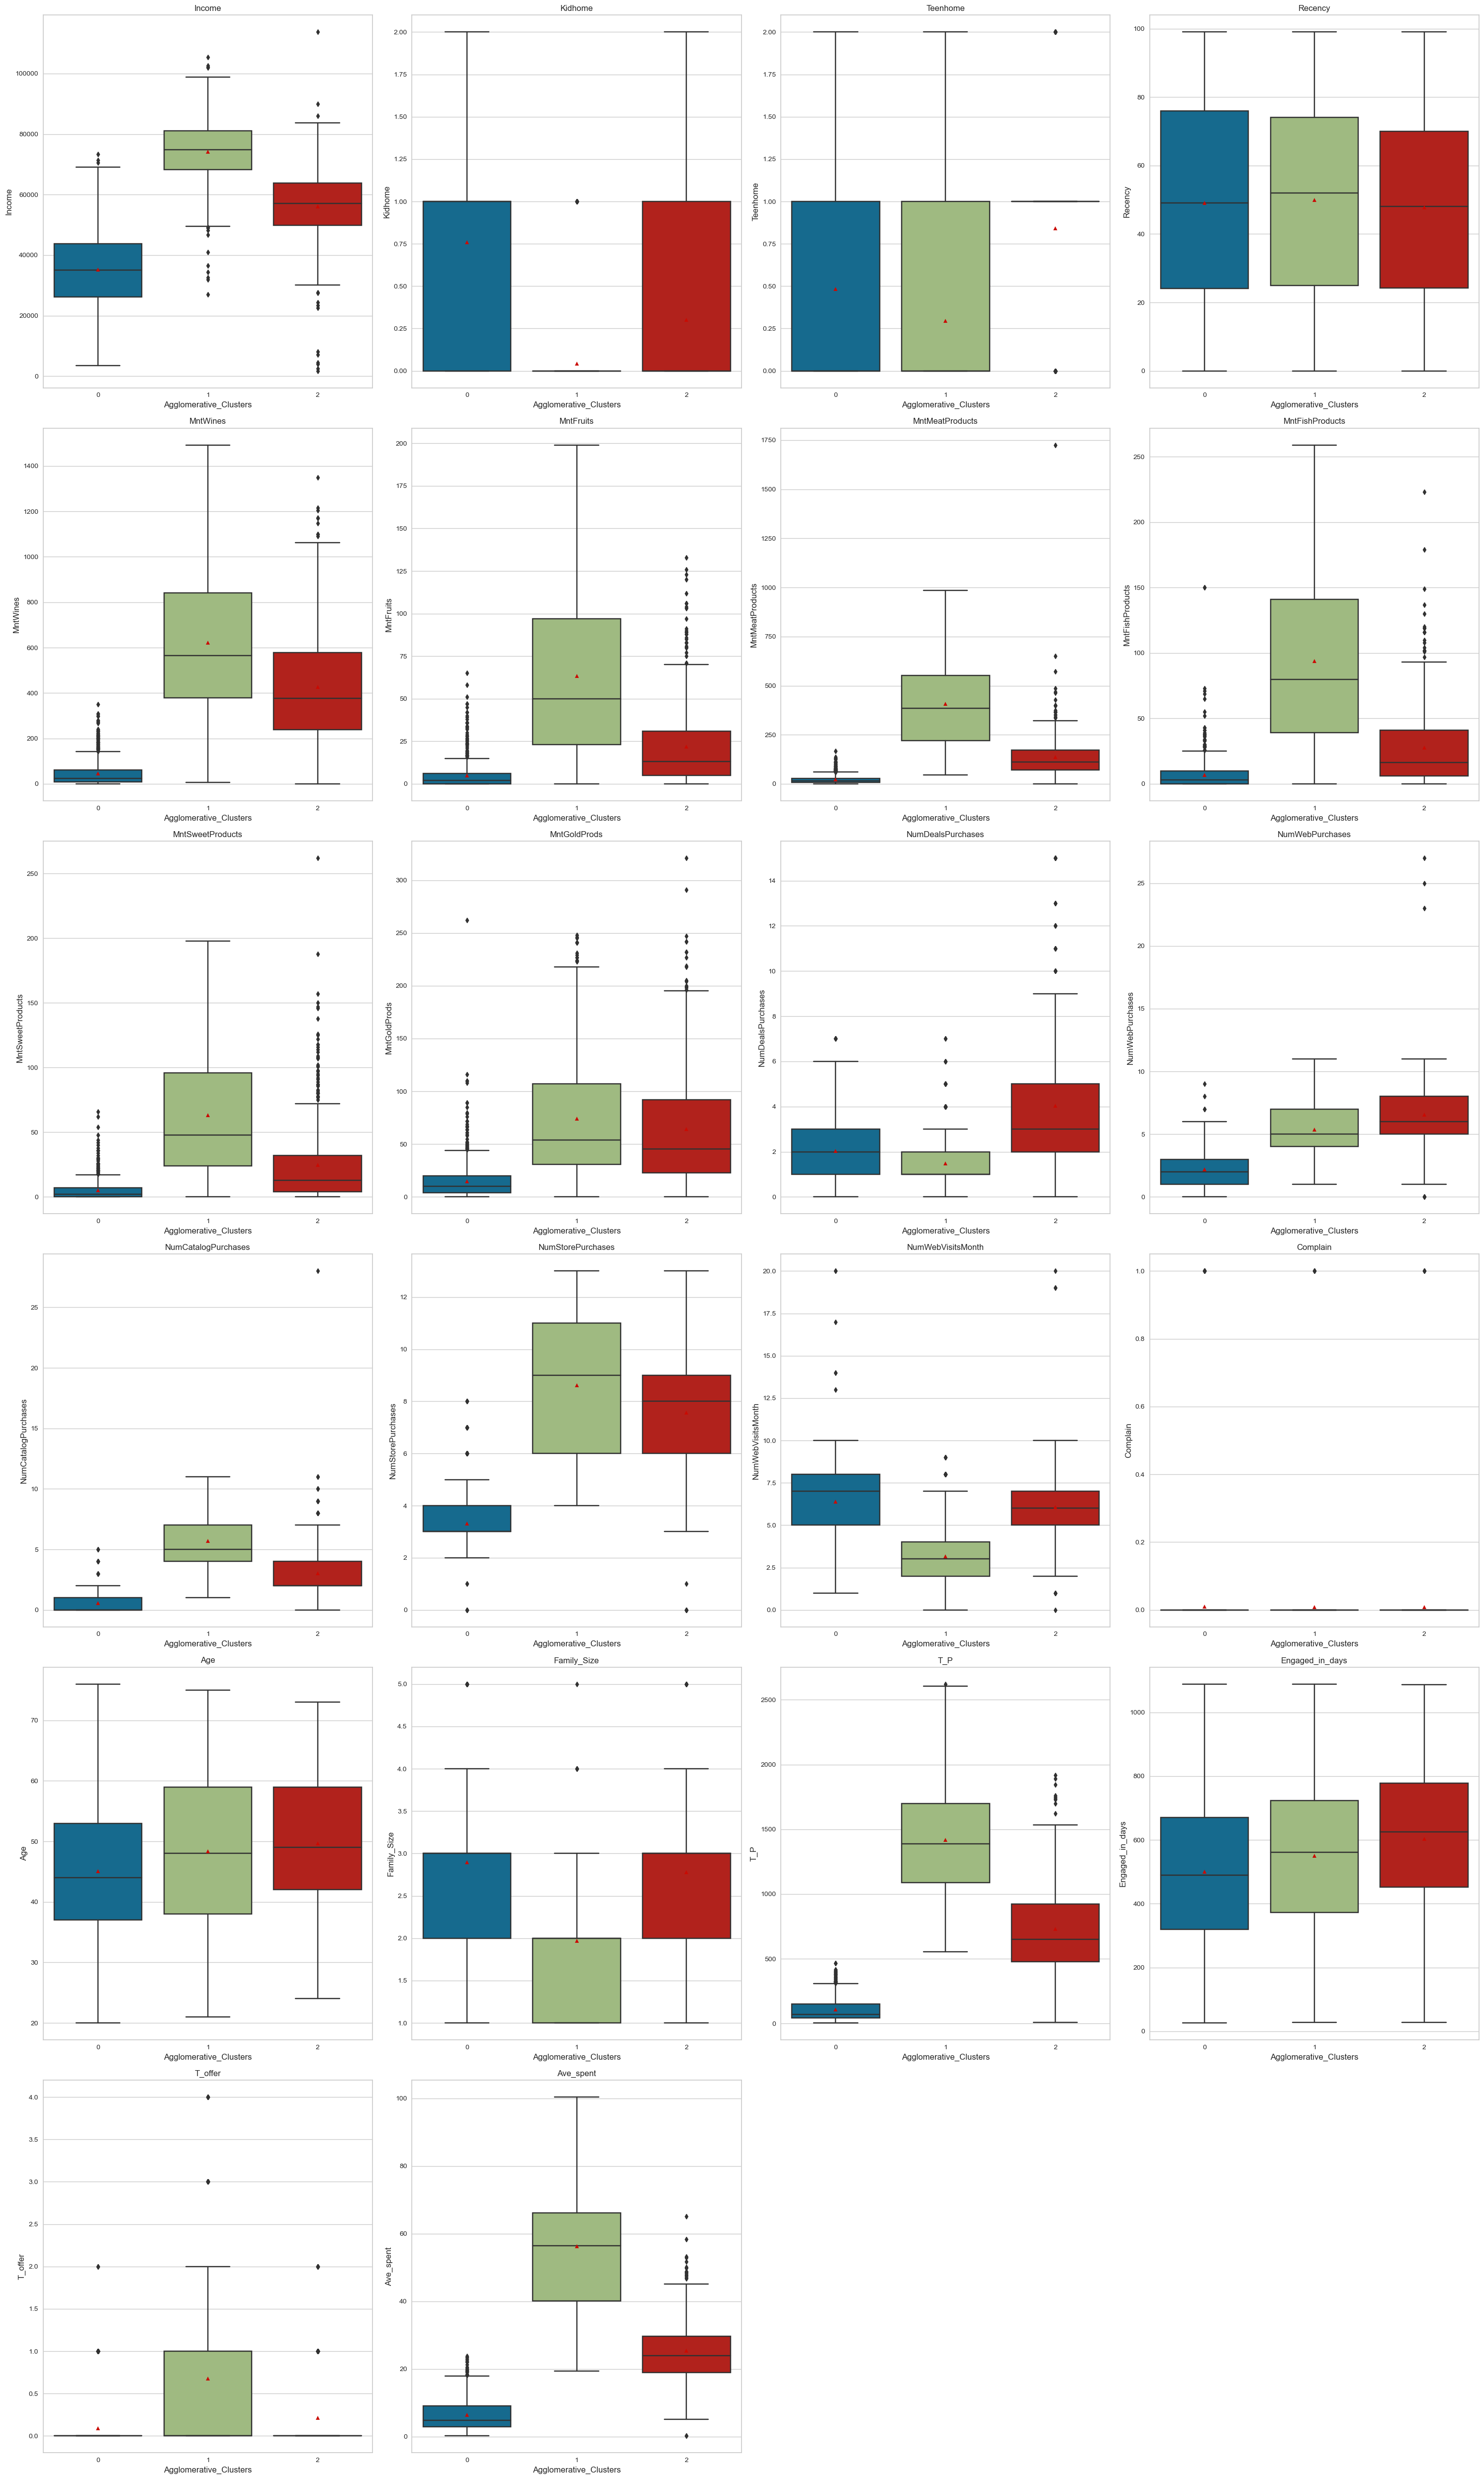

In [217]:
all_col = col_for_box

plt.figure(figsize=(30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=df[variable], x=df['Agglomerative_Clusters'], showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observations and Insights:** This cluster results are similar to the two models before. 

### **Characteristics of each cluster**

**Summary of each cluster:**
Cluster 0 has the lowest income and money spent but the highest family size, teens and kids number. The number of store purchase and web purchase are both the lowest. 

cluster 1 has the high income and money spent on all categories except for gold. For this category, the group 1's consumption is simialr to that of group2. This group's web purchase number is in the middle but the store purchase number is the highest. 

Cluster 2 has the middle income and spent. The all categories spent of group 2 is a little higher than that of group 0. This group prefer web shopping best. 

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [218]:
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  

In [221]:
from sklearn.cluster import DBSCAN


In [222]:
# Finding the silhouette_score for each of the combinations
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps=i, min_samples=j).fit(df_pca)               # Applying DBSCAN to each of the combination in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(df_pca, labels)           # Finding silhouette score 
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                     # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j              
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.1322050911585919
For eps value =2 For min sample =20 The average silhoutte_score is : 0.21123385480969153
For eps value =3 For min sample =6 The average silhoutte_score is : 0.22448780277450953
For eps value =3 For min sample =20 The average silhoutte_score is : 0.26806661057356607


In [223]:
print("Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(high_silhouette_avg, high_i_j[0], high_i_j[1]))

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


### **Apply DBSCAN for the best hyperparameter and visualize the clusters from PCA**

 1    776
 0    545
 2    503
-1    357
Name: DBSCAN_cluster_labels, dtype: int64


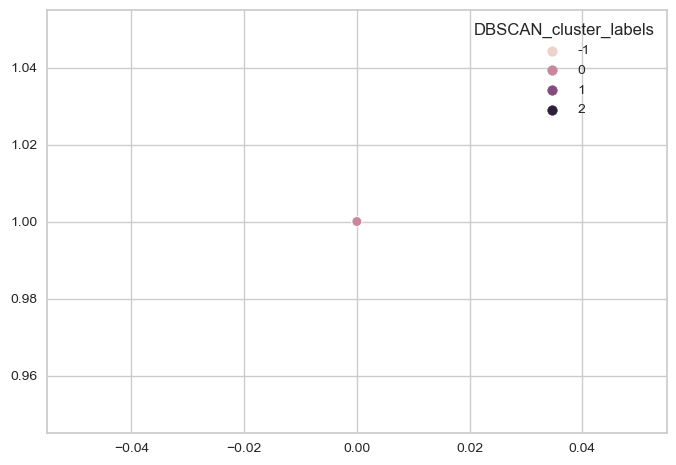

In [227]:
dbs = DBSCAN(eps=3, min_samples=20).fit(df_pca)

# Add DBSCAN cluster labels to the whole data
df["DBSCAN_cluster_labels"] = dbs.labels_

# Add DBSCAN cluster labels to data_model
df_model["DBSCAN_cluster_labels"] = dbs.labels_

# Add DBSCAN cluster labels to data_pca
df_pca["DBSCAN_cluster_labels"] = dbs.labels_

print(df_model["DBSCAN_cluster_labels"].value_counts())

def pca_plot(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=Y, data=PCA, hue=cluster)

pca_plot(0, 1, df_pca, "DBSCAN_cluster_labels")




In [228]:
cluster_profile_DBSCAN_cluster_labels = df.groupby('DBSCAN_cluster_labels').mean()

# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_DBSCAN_cluster_labels.style.highlight_max(color="lightgreen", axis=0)


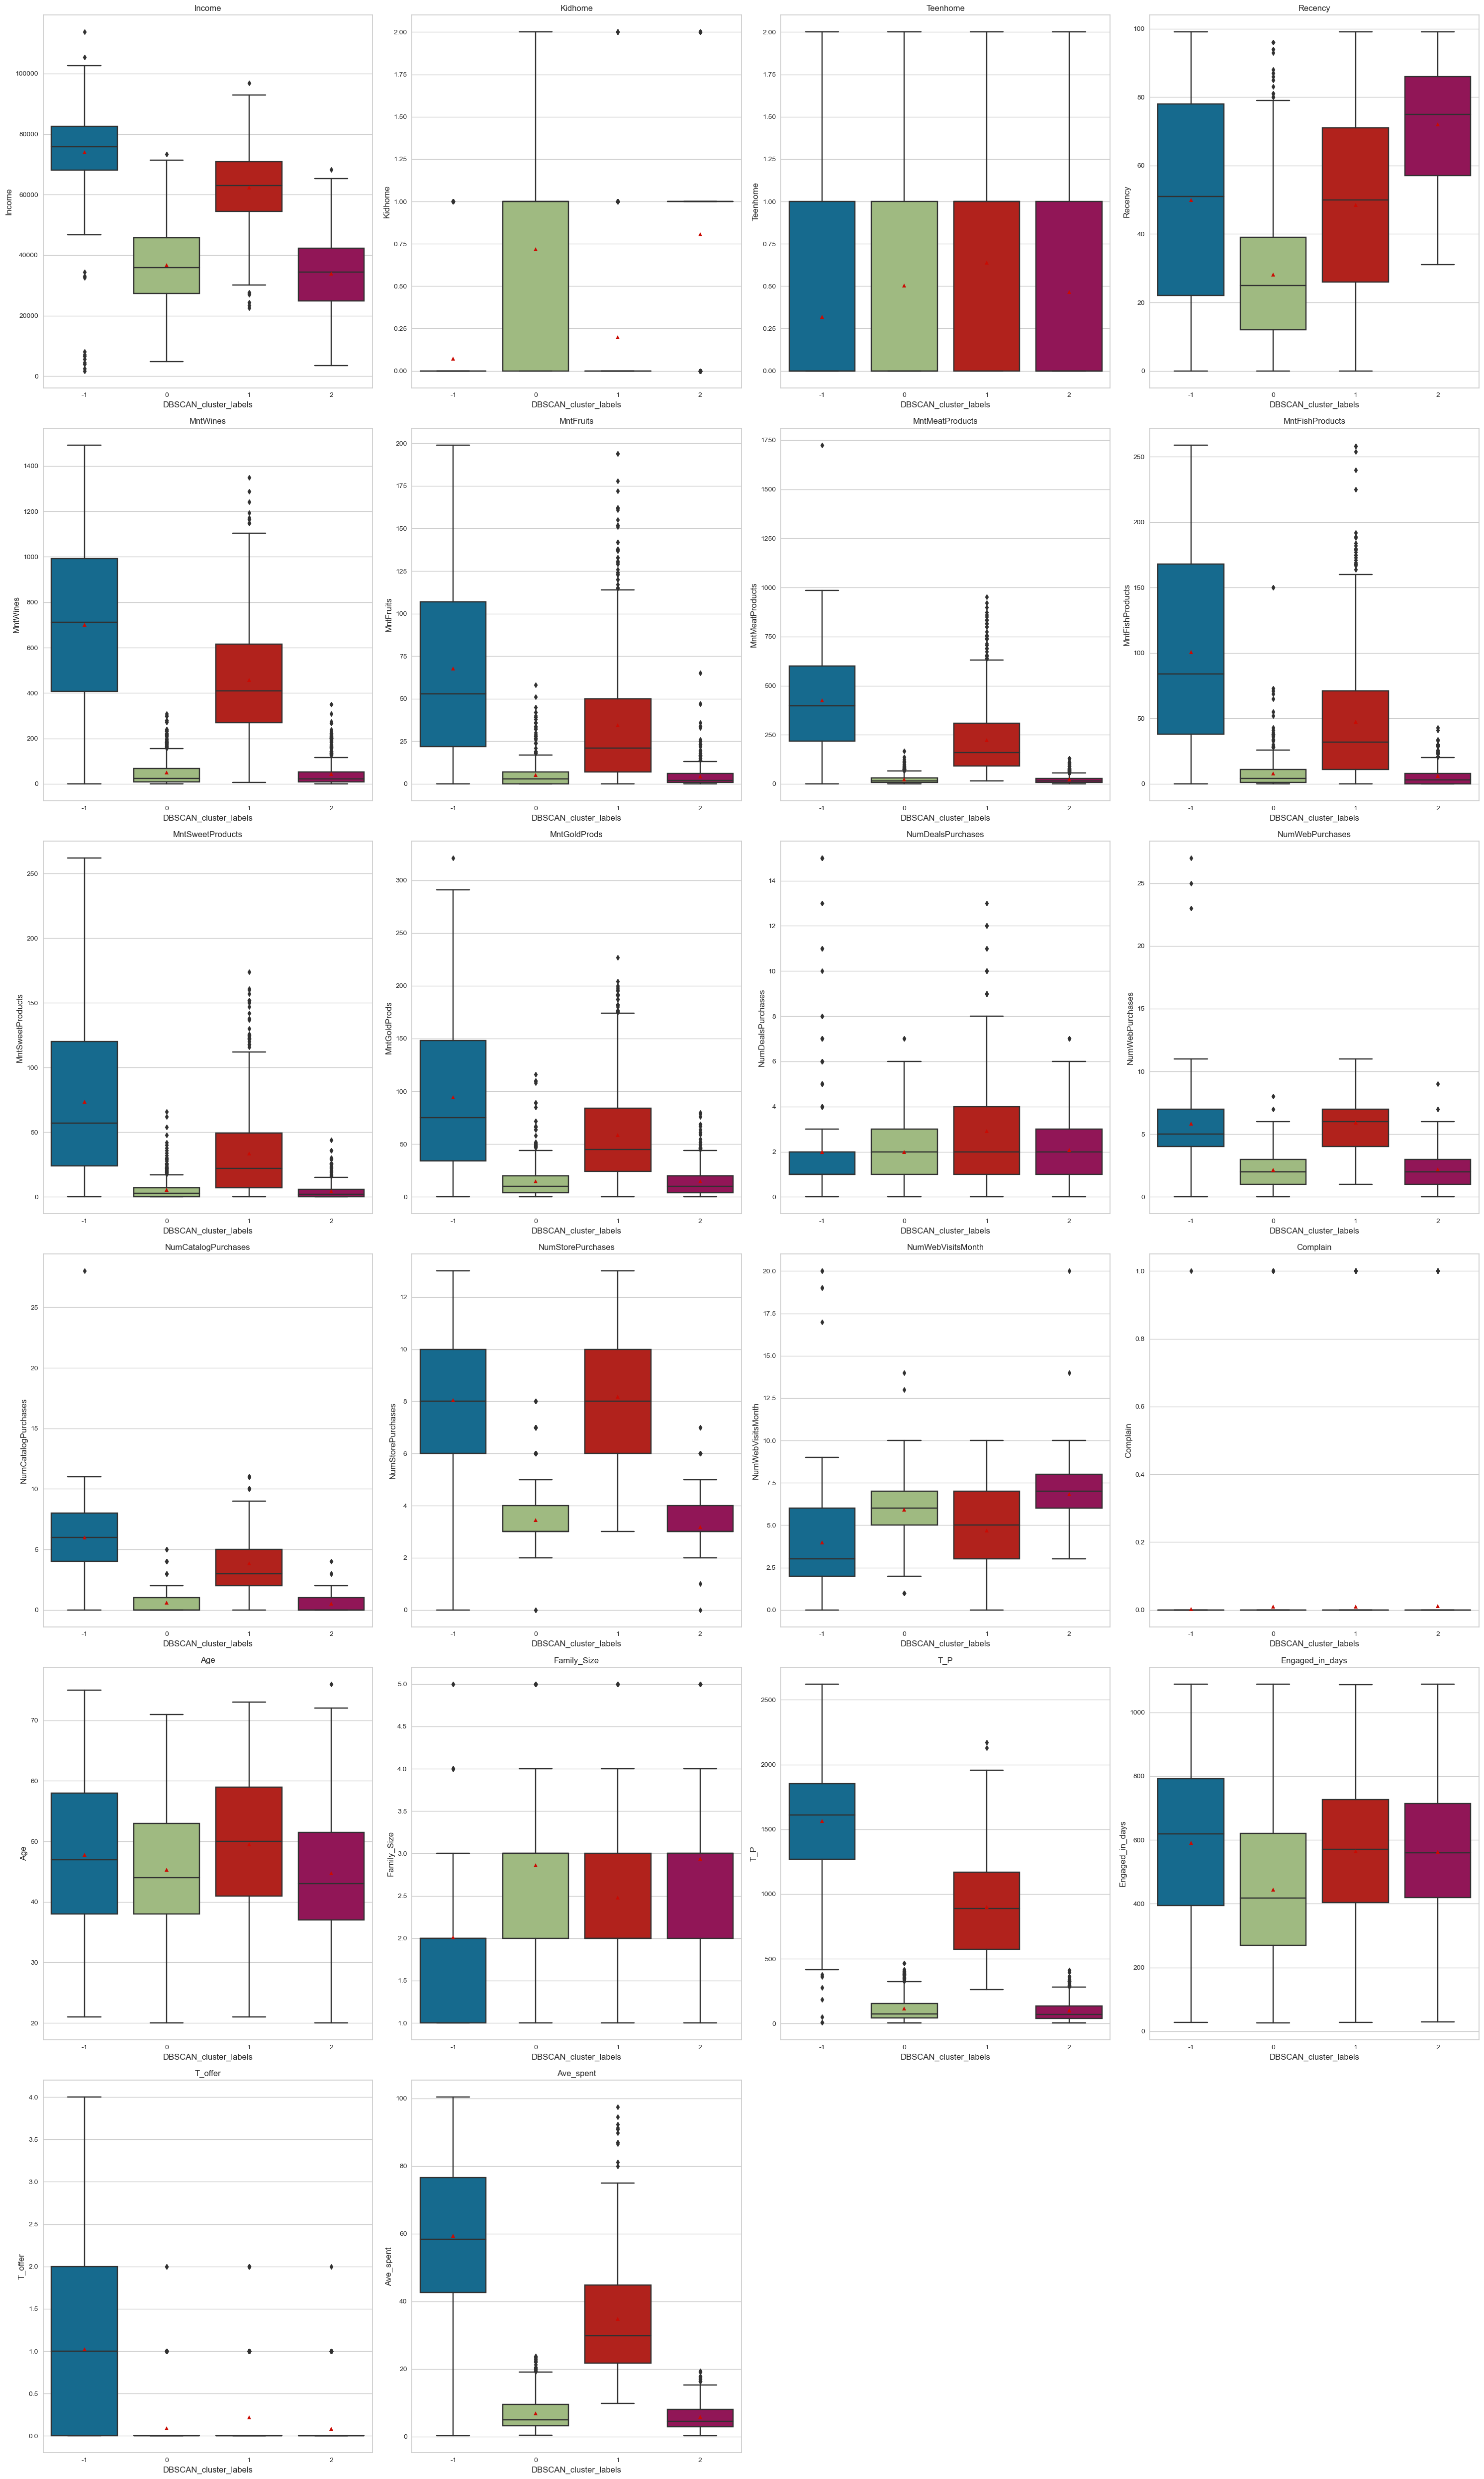

In [229]:
all_col = col_for_box

plt.figure(figsize=(30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=df[variable], x=df['DBSCAN_cluster_labels'], showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observations and Insights:** This parameter choosing is not good because the group 0 and group 2 are too similar. 

**Think about it:**

- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?

-1    1157
 0     527
 1     497
Name: DBSCAN_cluster_labels, dtype: int64


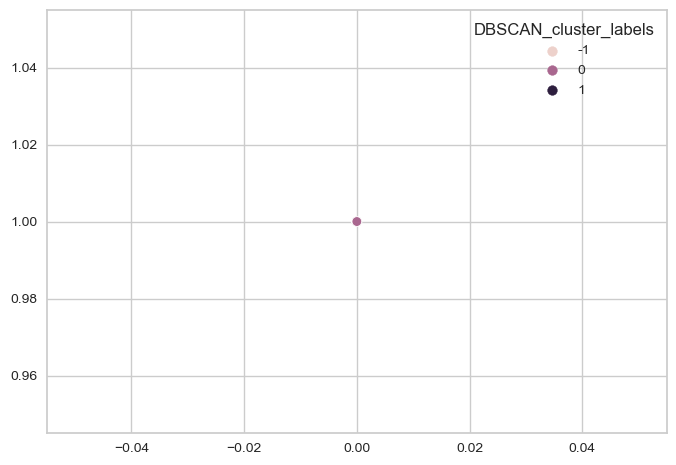

In [242]:
dbs = DBSCAN(eps=2, min_samples=100).fit(df_pca)

# Add DBSCAN cluster labels to the whole data
df["DBSCAN_cluster_labels"] = dbs.labels_

# Add DBSCAN cluster labels to data_model
df_model["DBSCAN_cluster_labels"] = dbs.labels_

# Add DBSCAN cluster labels to data_pca
df_pca["DBSCAN_cluster_labels"] = dbs.labels_

print(df_model["DBSCAN_cluster_labels"].value_counts())

def pca_plot(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=Y, data=PCA, hue=cluster)

pca_plot(0, 1, df_pca, "DBSCAN_cluster_labels")


In [243]:
cluster_profile_DBSCAN_cluster_labels = df.groupby('DBSCAN_cluster_labels').mean()

# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_DBSCAN_cluster_labels.style.highlight_max(color="lightgreen", axis=0)


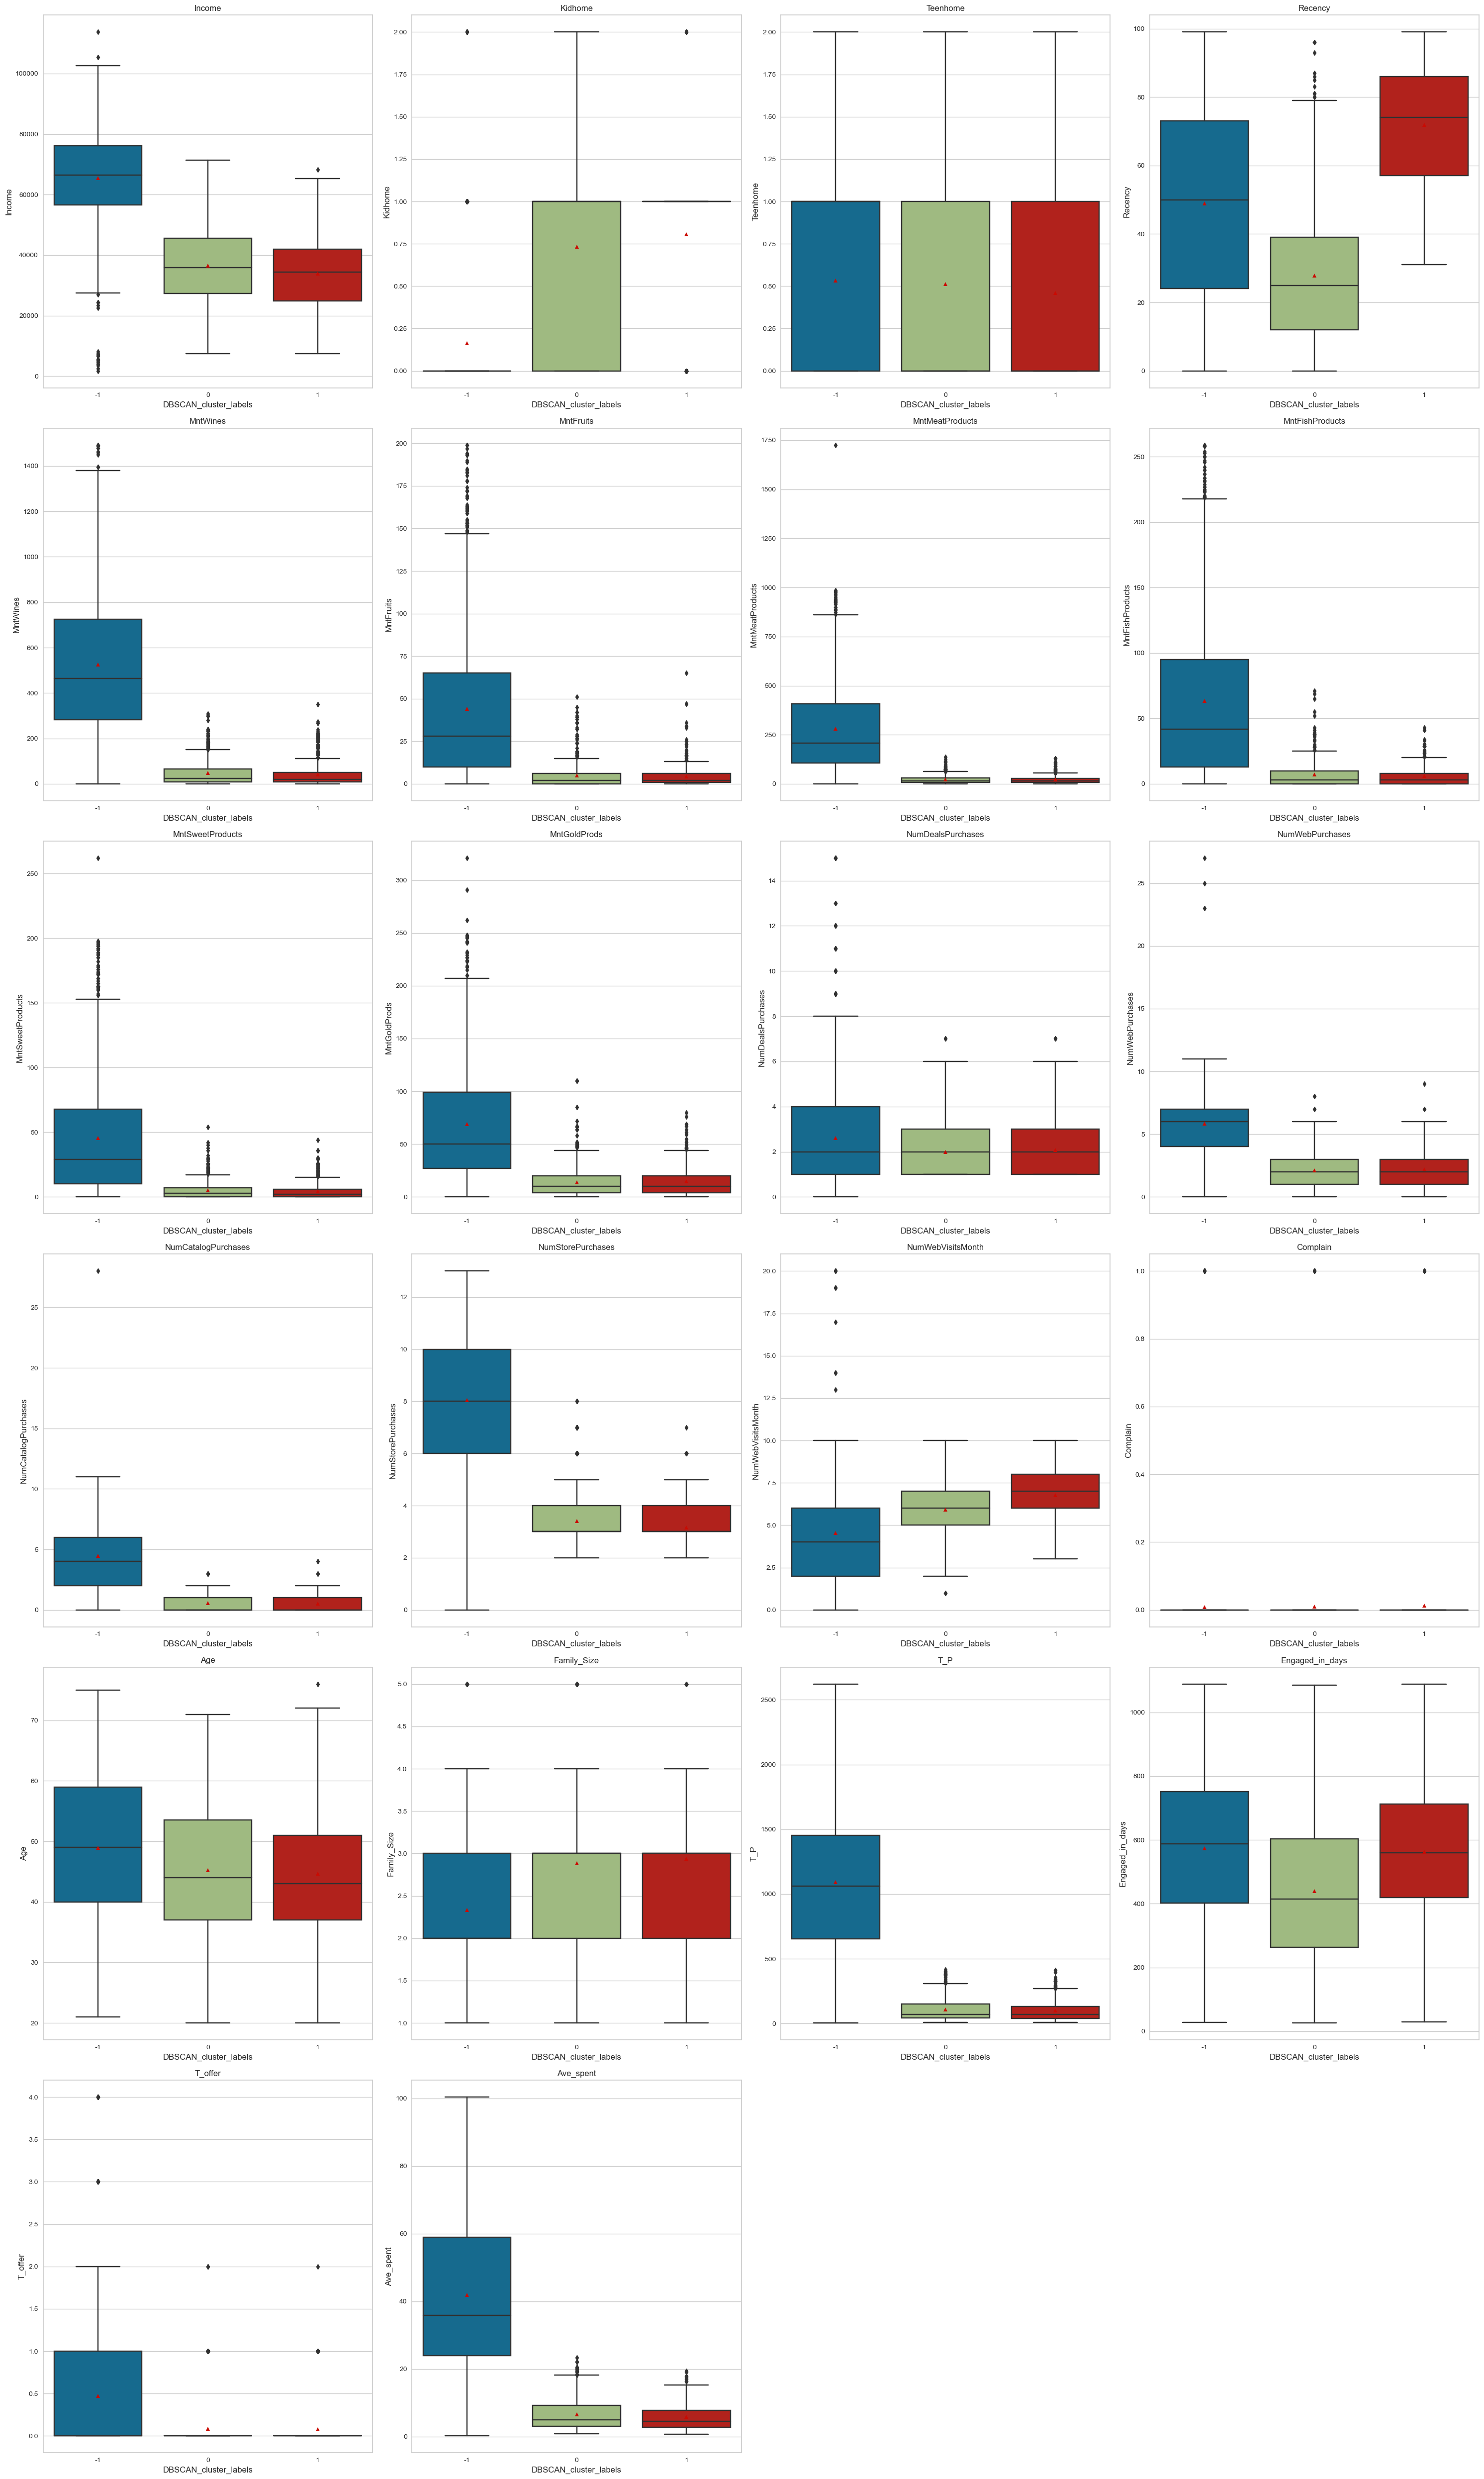

In [244]:
all_col = col_for_box

plt.figure(figsize=(30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=df[variable], x=df['DBSCAN_cluster_labels'], showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Summary of each cluster:**
No matter we use what parameter,it's seems that there are still two groups are generally smilar. 

Cluster-1: High income , high spent and performs both highest on web and store purchase number. 

Cluster 0 and cluster 1 have very close income and spent on all categoies of things. Hower, the cluster 1 has higher recency and kids number and engaged in days thann that of group 0. 

## **Gaussian Mixture Model**

In [245]:
gmm = GaussianMixture(n_components=5, random_state=1)  # Initialize Gaussian Mixture Model with number of clusters as 5 and random_state=1

preds = gmm.fit_predict(df_pca)                     # Fit and predict Gaussian Mixture Model using data_pca

score = silhouette_score(df_pca, preds)             # Calculate the silhouette score

print(score)   

0.2819787354576657


### **Visualize the clusters using PCA**

0    546
4    507
1    490
3    372
2    266
Name: GMM_Clusters, dtype: int64


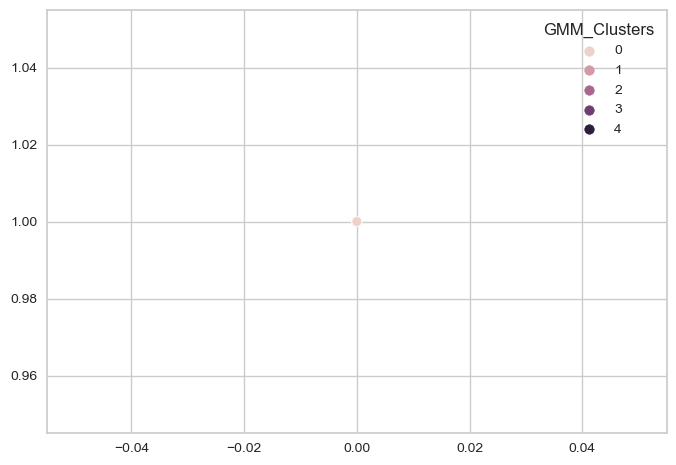

In [246]:
# Predicting on data_pca and add Gaussian Mixture Model cluster labels to the whole data
df['GMM_Clusters'] = gmm.predict(df_pca)

# Predicting on data_pca and add Gaussian Mixture Model cluster labels to data_model
df_model['GMM_Clusters'] = gmm.predict(df_pca)

# Predicting on data_pca and add Gaussian Mixture Model cluster labels to data_pca
df_pca['GMM_Clusters'] = gmm.predict(df_pca)
print(df_model["GMM_Clusters"].value_counts())

def pca_plot(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=Y, data=PCA, hue=cluster)

pca_plot(0, 1, df_pca, "GMM_Clusters")

### **Cluster Profiling**

In [247]:
cluster_profile_DBSCAN_cluster_labels = df.groupby('GMM_Clusters').mean()

# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_DBSCAN_cluster_labels.style.highlight_max(color="lightgreen", axis=0)


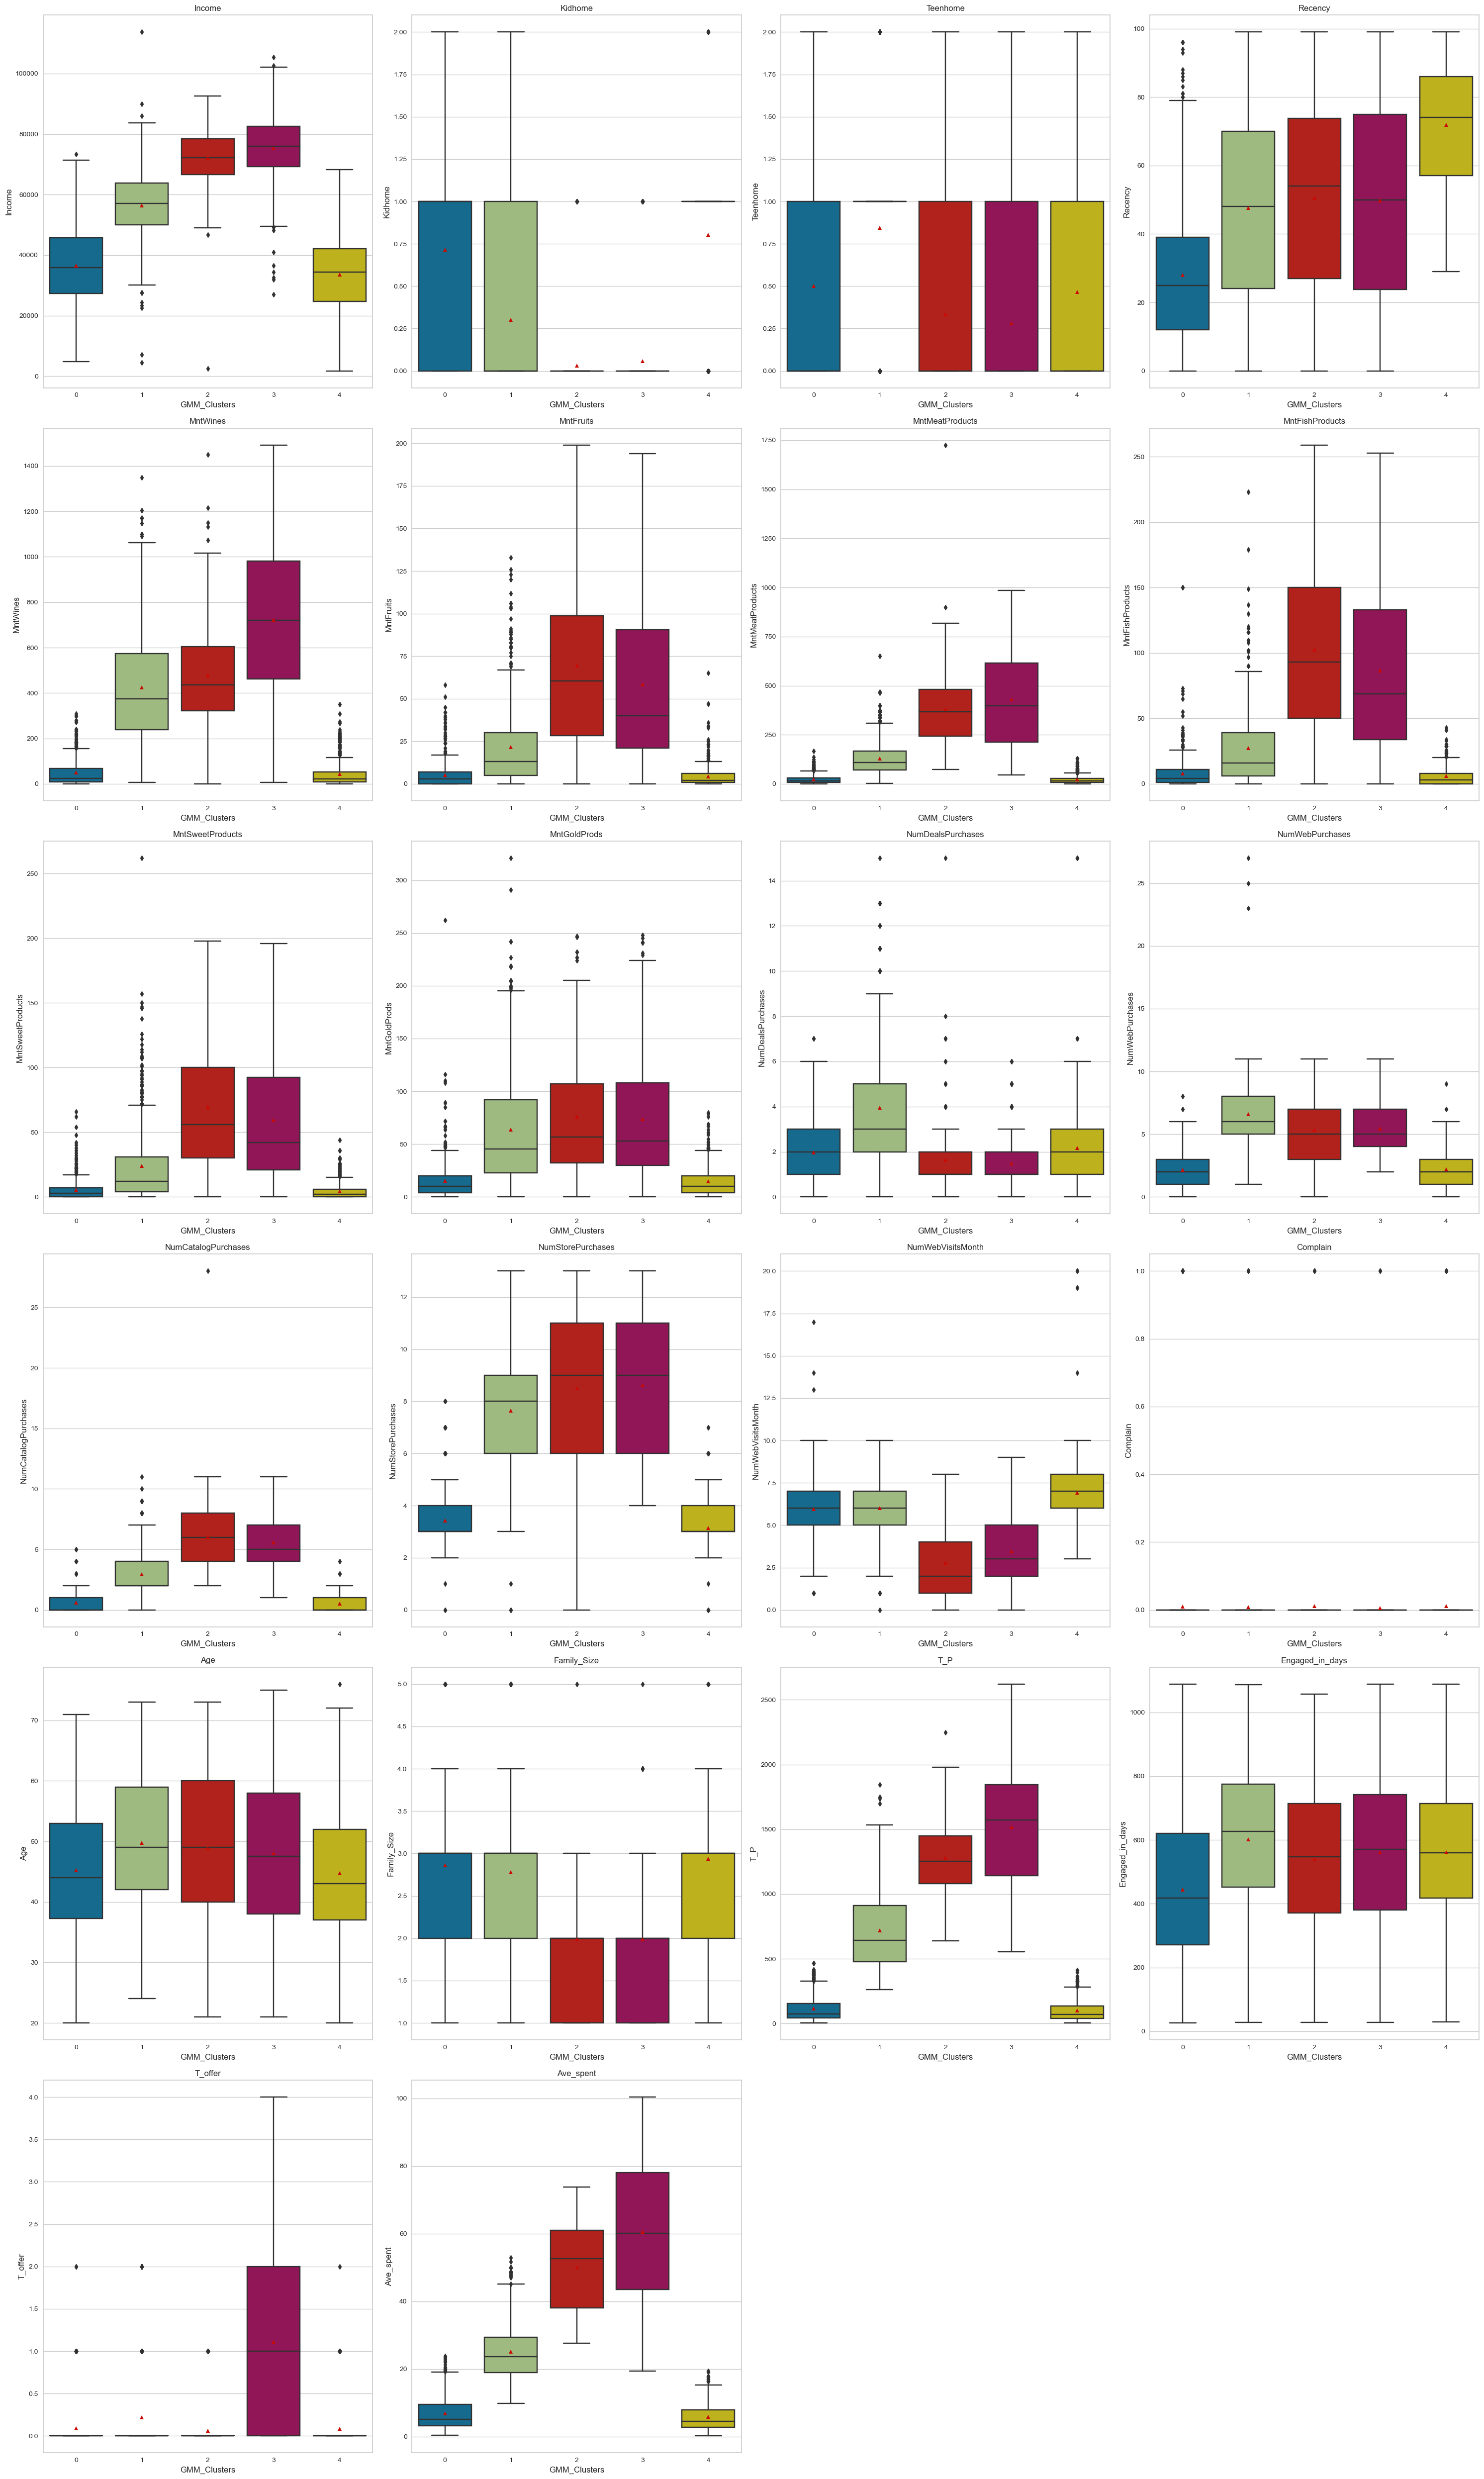

In [249]:
all_col = col_for_box

plt.figure(figsize=(30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=df[variable], x=df['GMM_Clusters'], showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observations and Insights:**
This model seems good due to the enough separate extent and the balance group size. 

### **Characteristics of each cluster**

**Summary of each cluster:**
Cluster 0 and cluster 4 have the lowest income and spent in every perspectives. The two groups are similar in most of levels. Onky the group cluster 4 has higher recency and lower kids number. 

Cluster 1 has the middle income and spent. This group has the highest purchase with discount and highest web visit number per month. 

Cluster 2 has teh second highest income but its spent on fish, fruits and sweet are the highest. 

Cluster 3 has the highest income and highest spent on meat and wine. It prefers store purchase most but not far from that of group 2. The web purchase number of this group is also similar to group 2. 

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

Based on the graphics beyond, the KMean and Hierarchy clustering seem perform better because they give the most different groups along the columns. Other models all will give too similar clusters. 

There may still scope to improve hierarchy clustering by trying different parameters for linkage and distances. 

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
1. the high income groups prefer store channel nmore than web channels and high incomne group usually with less kids and teens and less family size. The number of web visit is also low.

2. The middle income group usually buy the discount products most nad prefer the web channel most. 

3. The low income group usually with large family size and the times of web and store purchase are both low. 

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?
I propose to use hierarchy clustering model because this model not only perform good clustering beyond but also this model can change the cluster number to different but without reassigning datapoints. 

# Executive Summary

According to the visualization resulots from hierarchy clustering model, we can find the group features of the high income cluster with the income from 70000-80000. 
Firstly, their spent on fish, fruits, wine are more outstanding compared with other groups than meat and sweat and gold. 
Secondly, almost in all models' results, the high income group conduct the most purchase in store while not very low in web. 
Thirdly, the high income group usually include the oldest part of people.
Then, the high income group often appear in smaller family with less kids and teens, that is within 2 members . 
Moreover, the high group's web visiting time usually are lower and they accept campaign more than others. 

For middle income group, from 50000-60000+, their consumption situation of wine and gold are most close to high income group. Other categories still have respectively large distance. 

They buy products with discount also at most.

Their web purchase deeds amounts are similar to the low incoem group but the store shopping deeds are obviously higher than low income group. 

Their recency is always the longest. 

For low income group:
Their consumption on meat are very low;
Their general spent, average, total, categories, are lowest;
Their offline consumption deeds are seriously lower than the others but online converts;
Low and middle income group both hold very tiny acceptance rate of the offer in campaign. 


# Problem and Solution Summary

Marketing Solution for high income group:
1.1 Therefore, if we want to increase the advertisement burget targeted at high income group, we should concentrate more on fish, fruits, wine for more obviouse effects. 

1.2 The product supply and advertisement assignment should pay more attention to high income group's preferred categories and consumption preference. Considering about the oldest age group's hobbies and psychologies to cover their needs. 

1.3. The products recommendation for high income group can be prone to the product more appropriate for small family winthin 2. 

Solution for middle income group:
2.1. Combine the middle income group into the high income group as the targeted group of wine and gold. Because the two groups' consumption ability are not very different in these two categories. 
2.2 Recommend or apppear more discounts tips for middle income user on website. 
2.3. Show more products related to middle and low groups and suitable for family size of 2-3 members on web rather than store. 

Solution for low income group:
3.1. Optimize or design some particular campaign towards low and middle income group;
3.2. Provide more attractive products, discounts or campaign on web targeted at low income group. 


# Recommendations for Implementation

1. actionables
Basically, my solution does not involve breakthrough change or innovation, the feasibility seem good for all of them. However, whether they can be implemented still need in further analysis around the supply chain, marketing planning team and financial situation. 

2. Benefits
Solution 1.1, 1.2: Increase advertisement efficiency and effects
1.3: increase sales volumn help consumer find right things easily. 

Solution for middle income group:
2.1: Avoid advertisement and marketing campaigns need to be personalized for too many groups so that save cost.
2.2,2.3: increase sales volumn help consumer find right things easily. 

Solution for low income group:
3.1: increase marketing campaign effects;
3.2: increase sales volumn help consumer find right things easily.

3. cost
1) marketing and advertisement redesign and increasing cost;
2) supply line, store and web store's products reassign and management cost.

4. Risk
This kind of strategy improvements towards subdivided groups may not cause obvious effects on revenue but increase cost at the same time. 

Our consumer group's situation are not stable, the clustering distribution may change in short term but we cannot follow it all the time so we cannot ensure our strategy is always right. 